In [312]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

mpl.rcParams['axes.unicode_minus'] = False

total_list = pd.read_csv('total_list3.csv') # 전체데이터
boxoffice = pd.read_csv('boxoffice3.csv')   # 
genre_total = pd.read_csv('genre_total2.csv',  thousands = ',')   #천단위 숫자기호 제거
covid = pd.read_csv('year.csv',  thousands =',')# 코로나 확진자수 합계 데이터


In [102]:
import matplotlib.font_manager as fm

#1. 폰트 리스트 확인
# font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# font_list[:]

#2. 리스트 중, 기존 글꼴 가져오기

import matplotlib
fm.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rc('font', family='gulim')

# # 혹은 폰트 경로를 직접 전달해줘도 동작합니다.
# # 다만 사용가능한 폰트 목록과 확장자명 확인이 필요합니다.
font_location = 'C:\\Windows\\Fonts\\gulim.ttc' # for windows

font_nm = fm.FontProperties(fname=font_location).get_name() # 폰트명 가져와서 변수에 저장
matplotlib.rc('font', family=font_nm)

# 마이너스 글꼴 깨짐 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### 코로나 발생 후로 연 간 영화 관객수 줄었다 (2018--2021년 관객수 추이- 꺽은선 그래프)

In [314]:
total_list

,new,year,month,region,title,open_date,sales,sales_share,cum_sales,audience,cum_audience,screen_qty,screen_count,re_nation,nation,seat_rate,seat_share,seat_qty
0,20189강원도서치,2018,9,강원도,서치,2018-08-29,464393950,0.133,497280750,56195,60606,46,2524,미국,미국,0.149,0.004,376170.0
1,20189강원도명당,2018,9,강원도,명당,2018-09-19,401559200,0.115,401559200,49665,49665,54,1726,한국,한국,0.215,0.002,230210.0
2,20189강원도협상,2018,9,강원도,협상,2018-09-19,375726300,0.108,375726300,46214,46214,43,1560,한국,한국,0.215,0.002,214470.0
3,20189강원도너의 결혼식,2018,9,강원도,너의 결혼식,2018-08-22,285309850,0.082,597027650,35504,75235,43,1951,한국,한국,0.110,0.003,321915.0
4,20189강원도더 넌,2018,9,강원도,더 넌,2018-09-19,247248650,0.071,247248650,29677,29677,38,1101,미국,미국,0.194,0.001,152373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105286,20224충청북도소피의 세계,2022,4,충청북도,소피의 세계,2022-03-03,12000,0.000,333500,2,39,1,1,한국,한국,0.057,0.000,35.0
105287,20224충청북도리디밍 러브,2022,4,충청북도,리디밍 러브,2022-03-23,18000,0.000,78500,2,8,1,1,미국,미국,0.017,0.000,115.0
105288,20224충청북도달빛 그림자,2022,4,충청북도,달빛 그림자,2022-04-27,12000,0.000,12000,1,1,1,1,일본,일본,0.010,0.000,96.0
105289,20224충청북도아파치 정션 : 무법자의 지대,2022,4,충청북도,아파치 정션 : 무법자의 지대,2022-04-27,5000,0.000,5000,1,1,1,1,미국,미국,0.004,0.000,208.0


In [315]:
df2 = total_list

df2['year'] = df2['year'].astype('str')
df2['month'] = df2['month'].astype('str')
df2['year_month'] = df2['year'].map(str) +"-"+ df2['month']
df2

,new,year,month,region,title,open_date,sales,sales_share,cum_sales,audience,cum_audience,screen_qty,screen_count,re_nation,nation,seat_rate,seat_share,seat_qty,year_month
0,20189강원도서치,2018,9,강원도,서치,2018-08-29,464393950,0.133,497280750,56195,60606,46,2524,미국,미국,0.149,0.004,376170.0,2018-9
1,20189강원도명당,2018,9,강원도,명당,2018-09-19,401559200,0.115,401559200,49665,49665,54,1726,한국,한국,0.215,0.002,230210.0,2018-9
2,20189강원도협상,2018,9,강원도,협상,2018-09-19,375726300,0.108,375726300,46214,46214,43,1560,한국,한국,0.215,0.002,214470.0,2018-9
3,20189강원도너의 결혼식,2018,9,강원도,너의 결혼식,2018-08-22,285309850,0.082,597027650,35504,75235,43,1951,한국,한국,0.110,0.003,321915.0,2018-9
4,20189강원도더 넌,2018,9,강원도,더 넌,2018-09-19,247248650,0.071,247248650,29677,29677,38,1101,미국,미국,0.194,0.001,152373.0,2018-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105286,20224충청북도소피의 세계,2022,4,충청북도,소피의 세계,2022-03-03,12000,0.000,333500,2,39,1,1,한국,한국,0.057,0.000,35.0,2022-4
105287,20224충청북도리디밍 러브,2022,4,충청북도,리디밍 러브,2022-03-23,18000,0.000,78500,2,8,1,1,미국,미국,0.017,0.000,115.0,2022-4
105288,20224충청북도달빛 그림자,2022,4,충청북도,달빛 그림자,2022-04-27,12000,0.000,12000,1,1,1,1,일본,일본,0.010,0.000,96.0,2022-4
105289,20224충청북도아파치 정션 : 무법자의 지대,2022,4,충청북도,아파치 정션 : 무법자의 지대,2022-04-27,5000,0.000,5000,1,1,1,1,미국,미국,0.004,0.000,208.0,2022-4


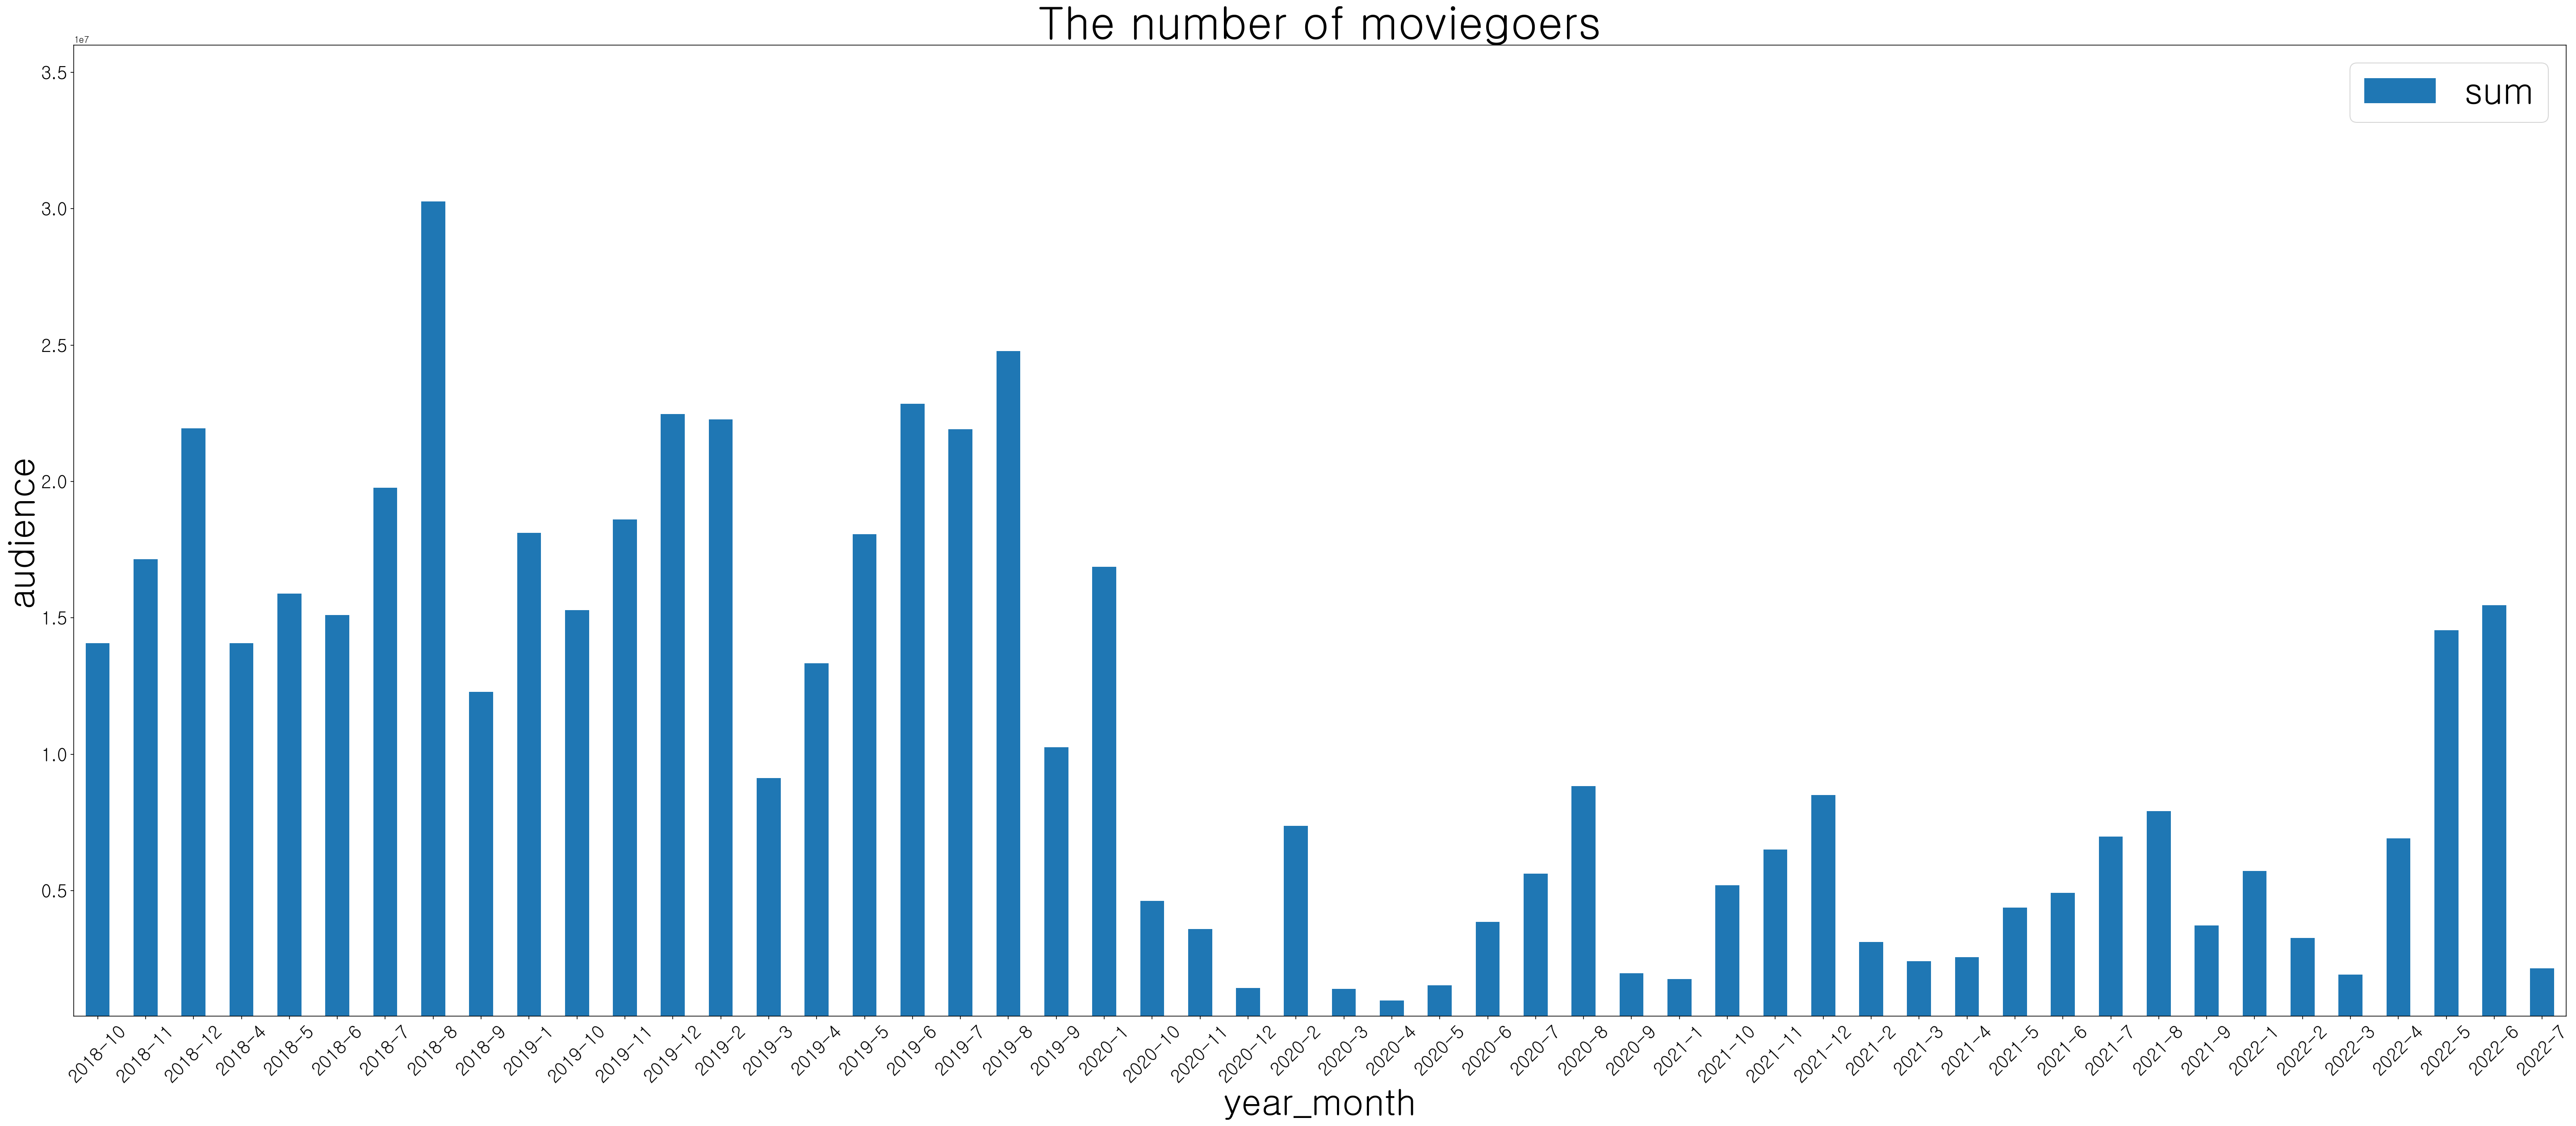

In [316]:
# 월 누적 관람객

df3 = df2.groupby(["year_month"])['audience'].agg(["sum"])
df3 = df3.reset_index()


# 그래프_2 관람객 수

df3.plot.bar(x = "year_month", y = "sum", rot = 45, figsize = (50, 20), fontsize = 20)
plt.xlabel('year_month', fontsize = 40)
plt.ylabel('audience',fontsize = 40)
plt.ylim(400000, 36000000)
plt.title("The number of moviegoers", fontsize = 50)

plt.legend(fontsize = 40)
plt.show()

## 그래프_1_확진자 수

In [317]:
covid['number'].astype('int')

0          11
1        2920
2        6855
3         979
4         703
5        1331
6        1506
7        5641
8        3865
9        2700
10       7688
11      26527
12      17471
13      11467
14      13415
15      18927
16      18331
17      16623
18      41374
19      53077
20      59857
21      53415
22      82517
23     183596
24     214821
25    2288502
26    9960561
27    4142610
28     866087
29     255914
Name: number, dtype: int32

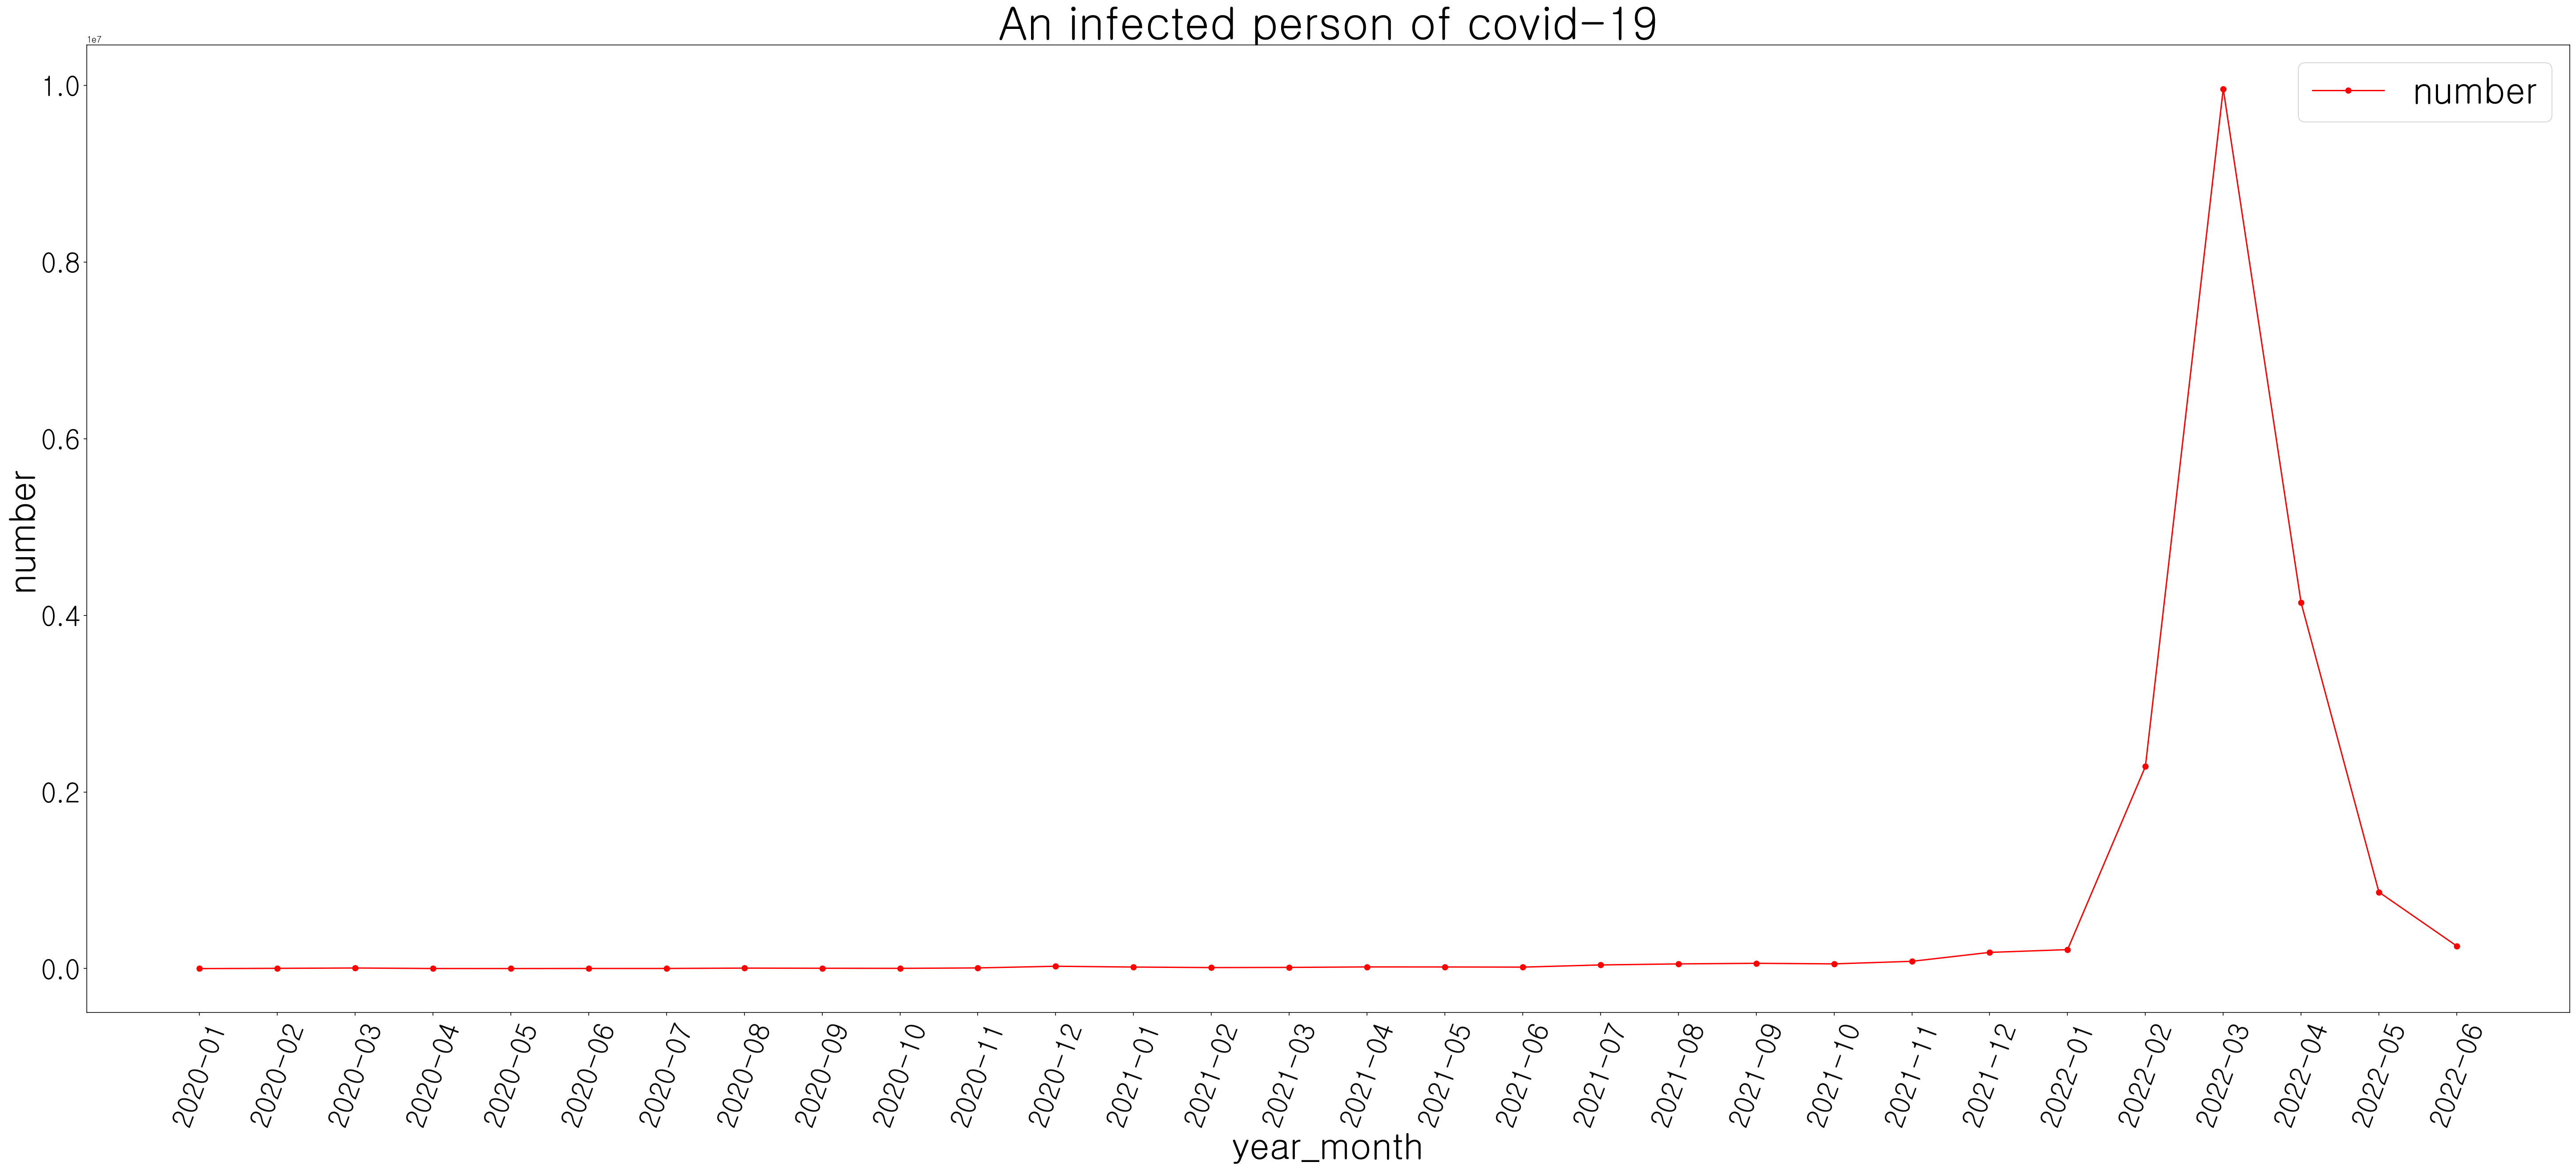

In [318]:
# 그래프_1_확진자 수

fig = plt.figure(figsize = (50, 20))
fig.set_facecolor("white")
ax = fig.add_subplot()

x = covid["year_month"]
y = covid["number"]


plt.plot(x, y, color = "red", marker = "o", label = "number")
plt.xlabel("year_month", fontsize = 40)
plt.xticks(fontsize = 30, rotation = 70)
plt.ylabel("number", fontsize = 40)
plt.yticks(fontsize = 30)
# plt.ylim(0, 11000000)
plt.title("An infected person of covid-19", fontsize = 50)

plt.legend(fontsize = 40)
plt.show()

In [334]:
x1 = x1[21:]

In [332]:
x2

0     2020-01
1     2020-02
2     2020-03
3     2020-04
4     2020-05
5     2020-06
6     2020-07
7     2020-08
8     2020-09
9     2020-10
10    2020-11
11    2020-12
12    2021-01
13    2021-02
14    2021-03
15    2021-04
16    2021-05
17    2021-06
18    2021-07
19    2021-08
20    2021-09
21    2021-10
22    2021-11
23    2021-12
24    2022-01
25    2022-02
26    2022-03
27    2022-04
28    2022-05
29    2022-06
Name: year_month, dtype: object

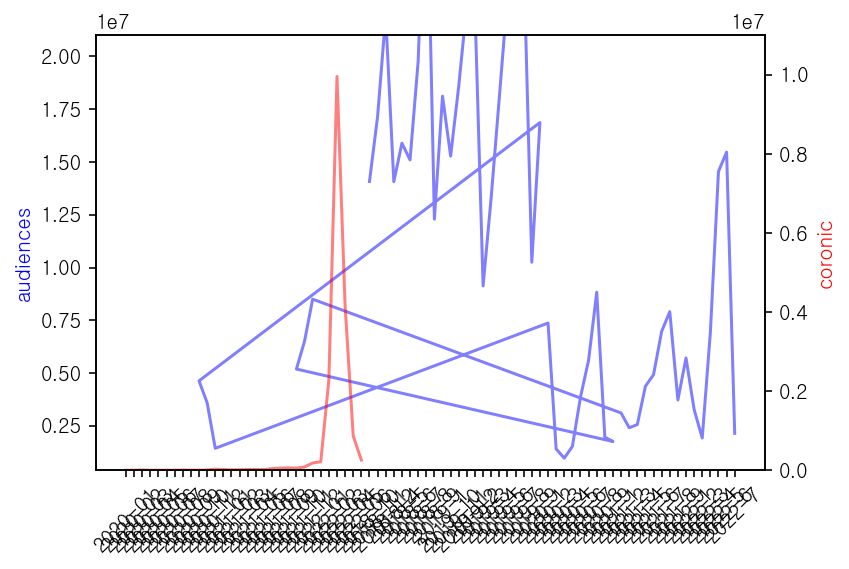

In [335]:
# 그래프 합치기


x1 = df3["year_month"]
x2 =  covid["year_month"]
y1 = df3["sum"]       # 확진자
y2 = covid["number"]    # 관람객

# 다중 플롯 지정
# ax1은 y1에 대하 그래프
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(x1, y1, color = "blue", alpha = 0.5) # 
ax1.set_ylabel("audiences", color = "blue", rotation = 90)
ax1.set_ylim(400000, 21000000)

# ax2는 y2에 대한 그래프
# twinx로 x축 공유
ax2 = ax1.twinx()
ax2.plot(x2, y2, color = "red", alpha = 0.5)
ax2.set_ylabel("coronic", color = "red", rotation = 90)
ax2.set_ylim(0, 11000000)

plt.show()

## 장르별 작품 편수

### 연도별 시각화

In [41]:
genre_total.drop('Unnamed: 0', axis=1, inplace = True)

In [42]:
# 연, 월 object로 변환 
genre_total['month'] = genre_total['month'].astype(object)
genre_total['year'] = genre_total['year'].astype(object)
genre_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         966 non-null    object 
 1   genre         966 non-null    object 
 2   number_movie  966 non-null    int64  
 3   t_use         966 non-null    int64  
 4   share         966 non-null    float64
 5   year          966 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 45.4+ KB


In [43]:
genre_total

,month,genre,number_movie,t_use,share,year
0,9,액션,2106,1487260,24.8,2018
1,9,드라마,3774,970147,16.2,2018
2,9,애니메이션,1047,750333,12.5,2018
3,9,판타지,166,595012,9.9,2018
4,9,멜로/로맨스,2165,416129,6.9,2018
...,...,...,...,...,...,...
961,4,다큐멘터리,494,27336,0.6,2020
962,4,기타,546,25376,0.6,2020
963,4,뮤지컬,44,6695,0.2,2020
964,4,서부극(웨스턴),52,2970,0.1,2020


In [44]:
# 2018년도

yearly_2018 = genre_total[genre_total['year']==2018]    # 전체 데이터에서 2018년도
yearly_2018_group = yearly_2018.groupby(['genre']).sum()   # 장르별 합계 
yearly_2018 = yearly_2018_group.sort_values(by ='t_use',ascending=False )  # 총 이용건수 내림차순 정렬 
yearly_2018_top5 = yearly_2018.head(5)   #top5 만 보기
yearly_2018_top5   ## 장르별, 총 이용건수의 상위 5개 
yearly_2018_top5  = yearly_2018_top5.reset_index()
yearly_2018_top5

# #2019년도

yearly_2019_top5 = genre_total[genre_total['year'] ==2019].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5)
yearly_2019_top5 = yearly_2019_top5.reset_index()
yearly_2019_top5

#2020년도
yearly_2020_top5 = genre_total[genre_total['year'] ==2020].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2020_top5
#2021년도
yearly_2021_top5 = genre_total[genre_total['year'] ==2021].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2021_top5

#2022년도
yearly_2022_top5 = genre_total[genre_total['year'] ==2022].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2022_top5

,genre,number_movie,t_use,share
0,액션,7764,1818286,81.0
1,애니메이션,3564,1179820,51.8
2,범죄,1521,1172873,51.9
3,드라마,13256,802636,36.5
4,멜로/로맨스,10460,456763,21.3


##### 파이차트 그릴때 주의점! 
- 파이차트의 값을 리스트로 변환해서 넣어야함!


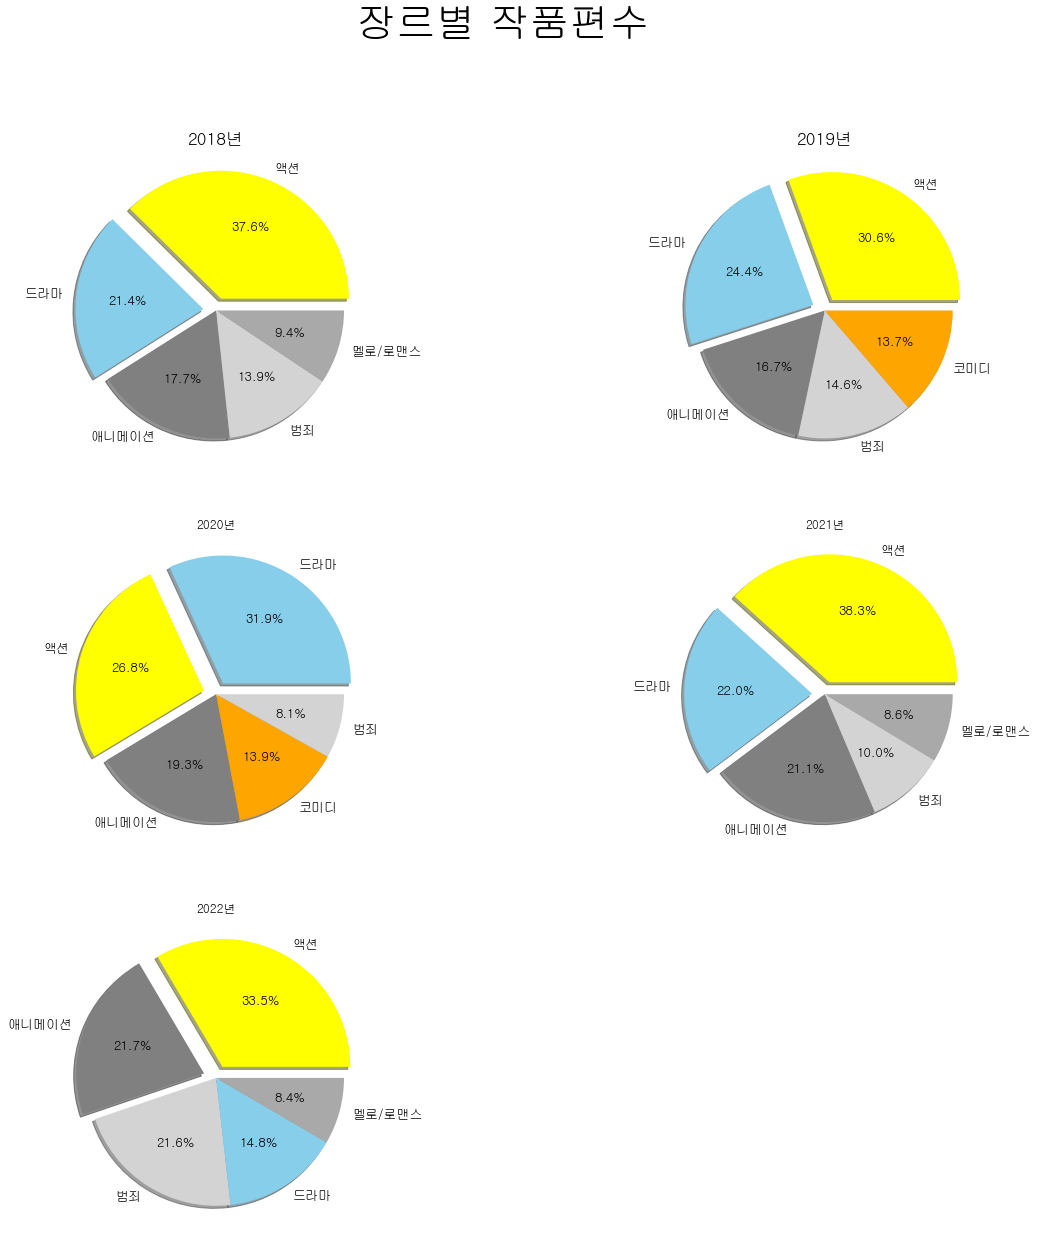

In [45]:
fig = plt.figure(figsize = (20,20)) 

colors = ['yellow', 'skyblue', 'gray','lightgray', 'darkgray']   # 액션, 드라마, 애니, 범죄, 멜로
colors2 = ['yellow', 'skyblue', 'gray','lightgray', 'orange']
colors3 = ['skyblue', 'yellow', 'gray','orange', 'lightgray']
colors4 = ['yellow', 'skyblue', 'gray','lightgray', 'darkgray']
colors5 = ['yellow', 'gray', 'lightgray','skyblue', 'darkgray']

######################
ax1 = plt.subplot(3,2,1)  # 행, 열, 위치

number = yearly_2018_top5['t_use']
labels = yearly_2018_top5['genre']
ax1.pie(number,   # 파이 값
        labels = labels,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
        colors = colors
       )   # 폰트 사이즈

ax1.set_title('2018년', size =17)

######################
ax2 = plt.subplot(3,2,2)  # 행, 열, 위치

number2 = yearly_2019_top5['t_use']
labels2 = yearly_2019_top5['genre']

ax2.pie(number2,   # 파이 값
        labels = labels2,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors2)   # 폰트 사이즈

ax2.set_title('2019년', size = 17)

##############
ax3 = plt.subplot(3,2,3)
number3 = yearly_2020_top5['t_use']
labels3 = yearly_2020_top5['genre']


colors2 = ['skyblue','yellow', 'pink','lightgray', 'gray']
ax3.pie( number3, 
        labels = labels3,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors3)   # 폰트 사이즈
              
ax3.set_title('2020년')

########
ax4 = plt.subplot(3,2,4)
number4 = yearly_2021_top5['t_use']
labels4 = yearly_2021_top5['genre']


ax4.pie( number4, 
        labels = labels4,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors4)   # 폰트 사이즈

ax4.set_title('2021년')


############
ax5 = plt.subplot(3,2,5)

number5 = yearly_2022_top5['t_use']
labels5 = yearly_2022_top5['genre']


ax5.pie( number5, 
        labels = labels5,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors5)   # 폰트 사이즈
              
ax5.set_title('2022년')


plt.suptitle('장르별 작품편수', fontsize = 40)
plt.show()

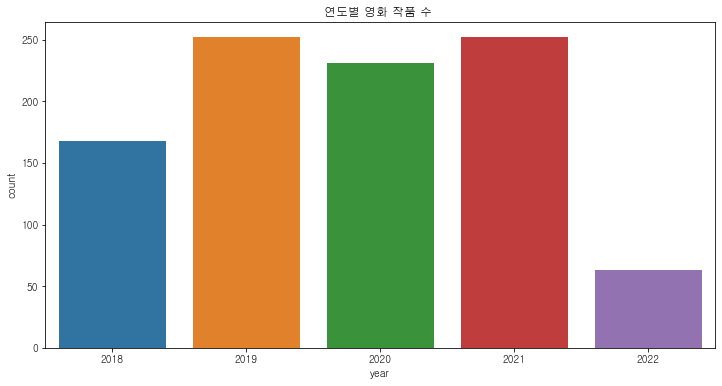

In [46]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax = sns.countplot(x = genre_total['year'])
plt.title('연도별 영화 작품 수 ')
plt.show()

### 코로나 전/후 비교 그래프 & 워드클라우드

In [47]:
b = pd.read_csv('before_covid_genre.csv', encoding = 'CP949',thousands = ',',skipfooter = 1)
ing = pd.read_csv('after_covid_genre.csv', encoding = 'CP949',thousands = ',',skipfooter = 1)
before_covid = b.drop(['기준'], axis = 1)
after_covid = ing.drop(['기준'], axis = 1)
after_covid.head(3)

C:\Users\wjd98\AppData\Local\Temp\ipykernel_15600\2364214394.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  b = pd.read_csv('before_covid_genre.csv', encoding = 'CP949',thousands = ',',skipfooter = 1)
C:\Users\wjd98\AppData\Local\Temp\ipykernel_15600\2364214394.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  ing = pd.read_csv('after_covid_genre.csv', encoding = 'CP949',thousands = ',',skipfooter = 1)


,장르,작품편수,총 이용건수,이용점유율
0,액션,3334,16833867,23.80%
1,드라마,6369,12677399,17.90%
2,애니메이션,1541,10284253,14.50%


Text(0.5, 1.0, 'after_covid')

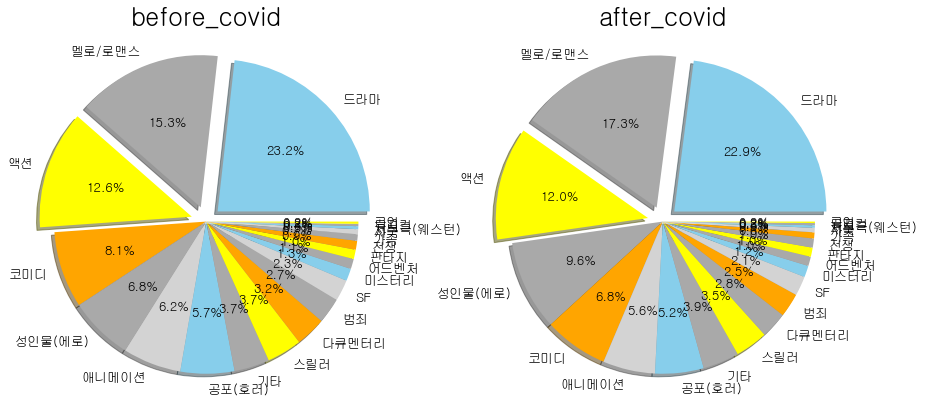

In [48]:
before_covid.sort_values(by='작품편수',ascending=False, inplace = True)
after_covid.sort_values(by='작품편수',ascending=False, inplace = True)


fig = plt.figure(figsize = (15,15)) 

######################
labels = before_covid['장르']
number = before_covid['작품편수']
colors = ['skyblue', 'darkgray', 'yellow','orange', 'darkgray', 'lightgray']  #드라마 멜로 액션 코미디
colors2 = ['skyblue', 'darkgray', 'yellow','darkgray', 'orange','lightgray']   # 드라마 맬로 액션 성인물
explode=[0.1, 0.1, 0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 

ax1 = plt.subplot(1,2,1)  # 행, 열, 위치

ax1.pie(number,   # 파이 값
        labels = labels,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=explode,    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
        colors = colors
       )   # 폰트 사이즈

ax1.set_title('before_covid', size =25)

######################
ax2 = plt.subplot(1,2,2)  # 행, 열, 위치

labels2 = after_covid['장르']
number2 = after_covid['작품편수']

ax2.pie(number2,   # 파이 값
        labels = labels2,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=explode,   # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors2)   # 폰트 사이즈

ax2.set_title('after_covid', size = 25)


(-0.5, 499.5, 349.5, -0.5)

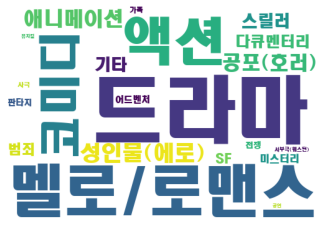

In [49]:
# 워드클라우드
#코로나 발생 전
from wordcloud import WordCloud    #워드 클라우드 생성을 위한 패키지
# from PIL import mage   #모양 변형시킬때 활용하는 이미지 사용 패키지
import matplotlib.pyplot as plt #그래프 출력 패키지
import numpy as np  # 수치연산


# 데이터 프레임 생성 및 딕셔너리 변환

before_covid 
wc = before_covid.set_index("장르").to_dict()["작품편수"]
# wc['Before_covid'] = 2500

wordCloud = WordCloud(
    font_path = 'HMKMRHD',   # 필수! 폰트지정
#     max_font_size = 00,   # 가장 빈도수가 높은 단어 폰트 사이즈
    width = 500, # 워드클라우드 너비지정
    height = 350, # 높이지정
   background_color = 'white'
    
).generate_from_frequencies(wc)  #워드 클라우드 빈도수 지정

plt.figure()
plt.imshow(wordCloud)
plt.axis('off')

(-0.5, 499.5, 349.5, -0.5)

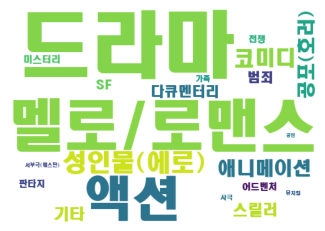

In [50]:
#코로나 발생 후
wc2 = after_covid.set_index("장르").to_dict()["작품편수"]
# wc2['After_covid'] =2000   # 타이틀로 변경하기

wordCloud = WordCloud(
    font_path = 'HMKMRHD',   # 필수! 폰트지정
#     max_font_size = 200,   # 가장 빈도수가 높은 단어 폰트 사이즈
    width = 500, # 워드클라우드 너비지정
    height = 350, # 높이지정
    background_color = 'white'
    
).generate_from_frequencies(wc2)  #워드 클라우드 빈도수 지정

plt.figure()
plt.imshow(wordCloud)
plt.axis('off')


## OTT서비스

In [348]:
import pandas as pd
ott = pd.read_csv('ott.csv')
ott.head(3)

,title,genre,year,category,ott
0,고뇌: 슈칼스키의 삶과 예술,전기,2018,다큐멘터리 영화,넷플릭스
1,글로리아 올레드: 약자 편에 선다,사회문화,2018,다큐멘터리 영화,넷플릭스
2,기쁨의 도시,사회문화,2018,다큐멘터리 영화,넷플릭스


In [349]:
# 연도별, 카테고리 카운트
ott_2017 = ott[ott['year'] == 2017]
ott_2017 = ott_2017.groupby(['category']).count()
ott_2017= ott_2017.reset_index()

ott_2018 = ott[ott['year'] == 2018]
ott_2018 = ott_2018.groupby(['category']).count()
ott_2018= ott_2018.reset_index()

ott_2019 = ott[ott['year'] == 2019]
ott_2019 = ott_2019.groupby(['category']).count()
ott_2019= ott_2019.reset_index()


ott_2020 = ott[ott['year'] == 2020]
ott_2020 = ott_2020.groupby(['category']).count()
ott_2020= ott_2020.reset_index()


ott_2021 = ott[ott['year'] == 2021]
ott_2021= ott_2021.groupby(['category']).count()
ott_2021= ott_2021.reset_index()

ott_2022 = ott[ott['year'] == 2022]
ott_2022= ott_2022.groupby(['category']).count()
ott_2022= ott_2022.reset_index()


In [350]:
# 없어진 연도 넣어주기
df = pd.DataFrame()
df['category'] = ott_2017['category']
df['count']= ott_2017['title']
df['year'] = '2017'

df1 = pd.DataFrame()
df1['category'] = ott_2018['category']
df1['count']= ott_2018['title']
df1['year'] = '2018'

df2 = pd.DataFrame()
df2['category'] = ott_2019['category']
df2['count']= ott_2019['title']
df2['year'] = '2019'

df4 = pd.DataFrame()
df4['category'] = ott_2021['category']
df4['count']= ott_2021['title']
df4['year'] = '2021'


df3 = pd.DataFrame()
df3['category'] = ott_2020['category']
df3['count']= ott_2020['title']
df3['year'] = '2020'


df5 = pd.DataFrame()
df5['category'] = ott_2022['category']
df5['count']= ott_2022['title']
df5['year'] = '2022'


In [351]:
df4

,category,count,year
0,다큐멘터리 영화,49,2021
1,드라마,111,2021
2,스페셜 영화,8,2021
3,영화,156,2021


In [360]:
# 데이터 합쳐주기
t_d = pd.DataFrame()

t_d = pd.concat([t_d, df])
t_d = pd.concat([t_d, df1])
t_d = pd.concat([t_d, df2])
t_d = pd.concat([t_d, df3])
t_d = pd.concat([t_d, df4])
t_d = pd.concat([t_d, df5])

t_d


,category,count,year
0,드라마,2,2017
0,다큐멘터리 영화,25,2018
1,드라마,24,2018
2,스페셜 영화,5,2018
3,영화,68,2018
0,다큐멘터리 영화,39,2019
1,드라마,60,2019
2,스페셜 영화,11,2019
3,영화,74,2019
0,다큐멘터리 영화,36,2020


In [364]:
s_t = t_d.groupby(['year']).sum('count')

In [379]:
s_t = s_t.reset_index()
s_t

,index,year,count
0,0,2017,2
1,1,2018,122
2,2,2019,184
3,3,2020,248
4,4,2021,324
5,5,2022,182


Text(0.5, 1.0, 'OTT자제 제작 컨텐츠 카테고리별 연도별 추이')

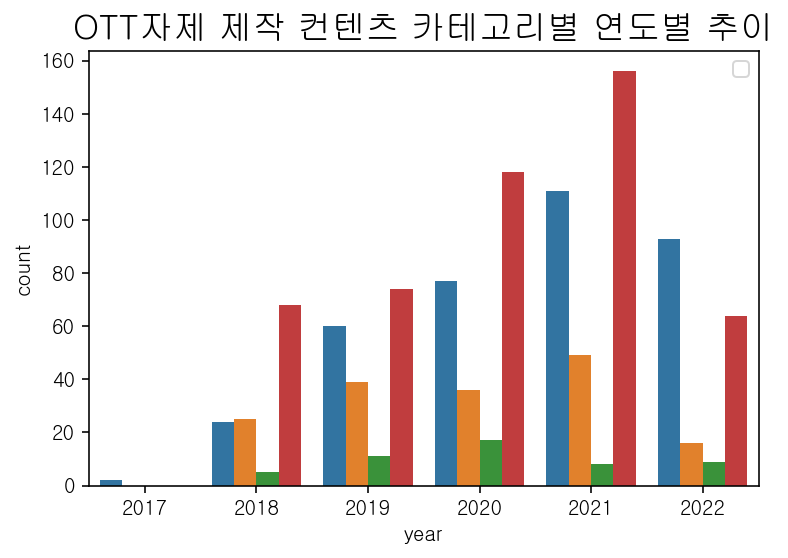

In [405]:
# plt.figure(figsize = (10,7))

fig, ax = plt.subplots(1,1)

ax = sns.barplot(x = 'year', y = 'count', data = t_d ,hue='category')

# ax = sns.barplot(x = 'year', y = 'count', data = s_t )

plt.legend('')
plt.title("OTT자제 제작 컨텐츠 카테고리별 연도별 추이",size = 17)


## OTT 이용고객 2018-2021

In [91]:
df4 = pd.read_excel('OTT_20182021.xlsx',engine='openpyxl', sheet_name = 0)
df4.head(3)

,매체,2018,2019,2020,2021
0,Olleh TV 모바일,1.0,1.0,0.0,0.0
1,Oksusu,2.2,3.4,0.0,0.0
2,Pooq,2.5,2.9,0.0,0.0


In [92]:
df4.set_index('매체', inplace=True)  # '매체'열을 인덱스로 전환

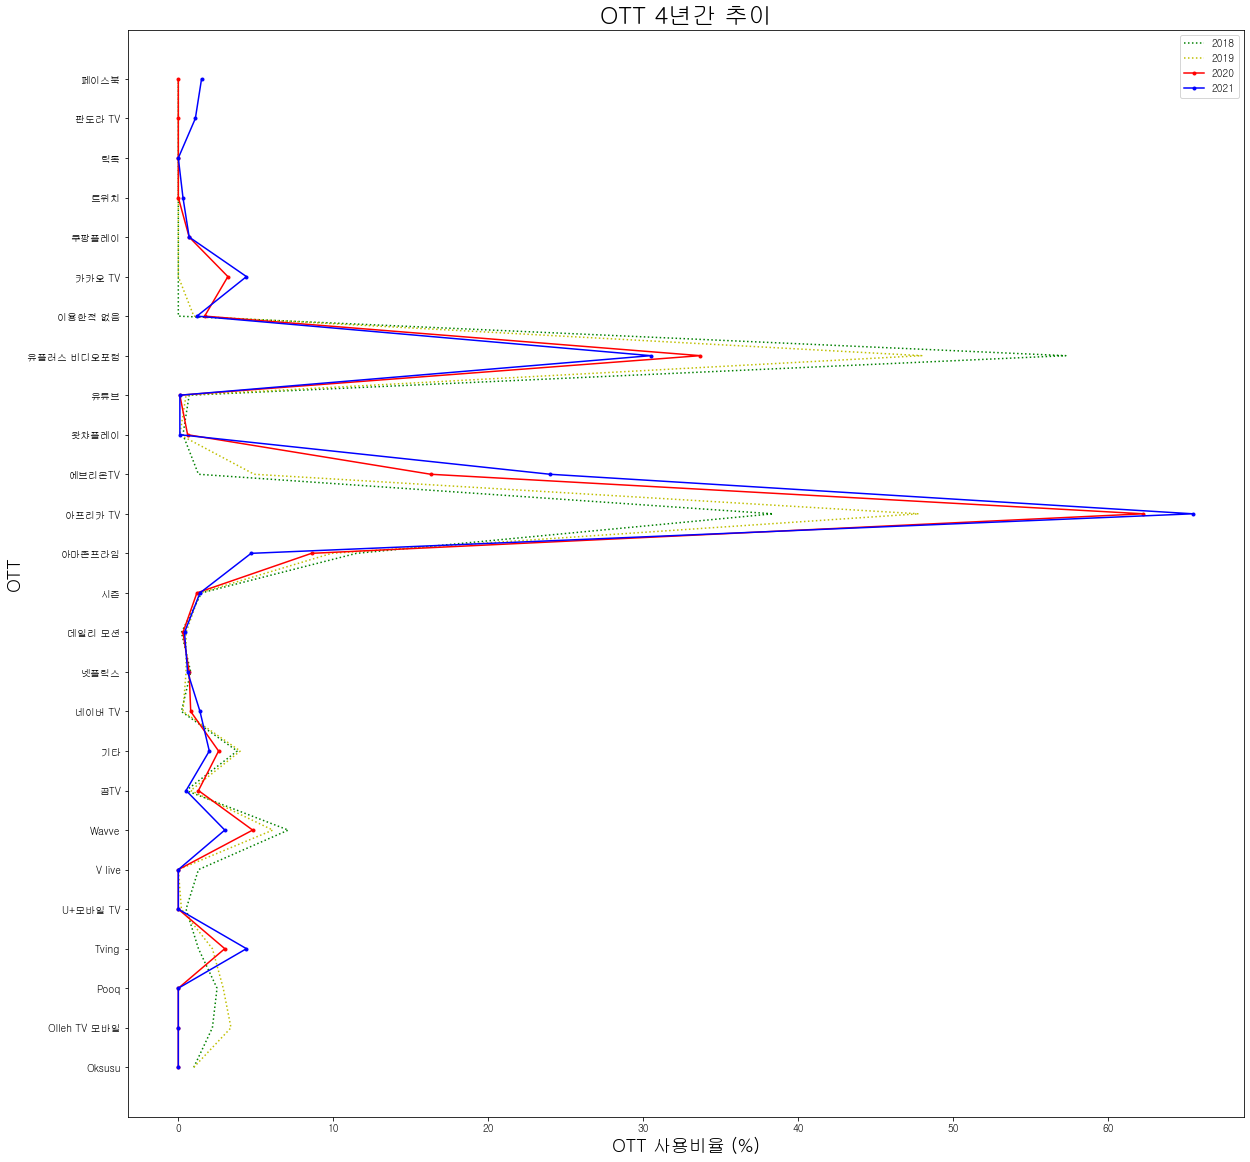

In [93]:
plt.figure(figsize=(20,20))
plt.title('OTT 4년간 추이', fontsize='24')

plt.plot(df4['2018'], df4.sort_index().index, 'g:', label='2018')
plt.plot(df4['2019'], df4.sort_index().index, 'y:', label='2019')
plt.plot(df4['2020'], df4.sort_index().index, 'r.-', label='2020')
plt.plot(df4['2021'], df4.sort_index().index, 'b.-', label='2021')

plt.xlabel('OTT 사용비율 (%)' , fontsize='18')
plt.ylabel('OTT', fontsize='18')
plt.legend()
plt.show()

In [95]:
total_OTT =df4.T # 행/열 전환
total_OTT

매체,Olleh TV 모바일,Oksusu,Pooq,Tving,에브리온TV,유플러스 비디오포럼,네이버 TV,V live,아프리카 TV,왓챠플레이,...,데일리 모션,기타,이용한적 없음,U+모바일 TV,Wavve,시즌,쿠팡플레이,아마존프라임,트위치,틱톡
2018,1.0,2.2,2.5,1.3,0.5,1.3,7.1,0.5,3.8,0.2,...,0.3,0.7,57.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,1.0,3.4,2.9,2.2,0.2,0.0,6.1,0.8,4.0,0.3,...,0.1,0.5,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,0.0,0.0,0.0,3.0,0.0,0.0,4.8,1.3,2.6,0.8,...,0.6,0.1,33.7,1.7,3.2,0.7,0.0,0.0,0.0,0.0
2021,0.0,0.0,0.0,4.4,0.0,0.0,3.0,0.5,2.0,1.4,...,0.1,0.1,30.5,1.2,4.4,0.7,0.3,0.0,1.1,1.5


In [100]:
total_OTT.index

Index(['2018', '2019', '2020', '2021'], dtype='object')

In [101]:
total_OTT

매체,Olleh TV 모바일,Oksusu,Pooq,Tving,에브리온TV,유플러스 비디오포럼,네이버 TV,V live,아프리카 TV,왓챠플레이,...,데일리 모션,기타,이용한적 없음,U+모바일 TV,Wavve,시즌,쿠팡플레이,아마존프라임,트위치,틱톡
2018,1.0,2.2,2.5,1.3,0.5,1.3,7.1,0.5,3.8,0.2,...,0.3,0.7,57.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,1.0,3.4,2.9,2.2,0.2,0.0,6.1,0.8,4.0,0.3,...,0.1,0.5,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,0.0,0.0,0.0,3.0,0.0,0.0,4.8,1.3,2.6,0.8,...,0.6,0.1,33.7,1.7,3.2,0.7,0.0,0.0,0.0,0.0
2021,0.0,0.0,0.0,4.4,0.0,0.0,3.0,0.5,2.0,1.4,...,0.1,0.1,30.5,1.2,4.4,0.7,0.3,0.0,1.1,1.5


In [173]:
OTT_list = []   #OTT 리스트 
for num in total_OTT.columns:
    OTT_list.append(num)


In [107]:

plt.figure(figsize=(20,15))
plt.title('OTT 사용율(%) 추이 2018-2021 ', fontsize=28)

plt.plot(x = total_OTT.index, y=total_OTT, 'k:')
plt.plot(total_OTT.index, total_OTT['유튜브'], 'go-',  label='유튜브')
plt.plot(total_OTT.index, total_OTT['넷플릭스'], 'bo-',  label='넷플릭스')
plt.plot(total_OTT.index, total_OTT['이용한적 없음'], 'ro-', label='이용한적 없음')
plt.grid(True, axis='y', color='grey', alpha=0.5, linestyle='-')


plt.ylabel('OTT 사용비율 (%)', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.fill_between(total_OTT.index[1:4], total_OTT['유튜브'][1:4], total_OTT['이용한적 없음'][1:4], color = 'orange', alpha = 0.3)
plt.ylim([0, 80])     # Y축의 범위: [ymin, ymax]
plt.legend(fontsize=28)
plt.show()

SyntaxError: positional argument follows keyword argument (2176815311.py, line 4)

### OTT 4년간 추이

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


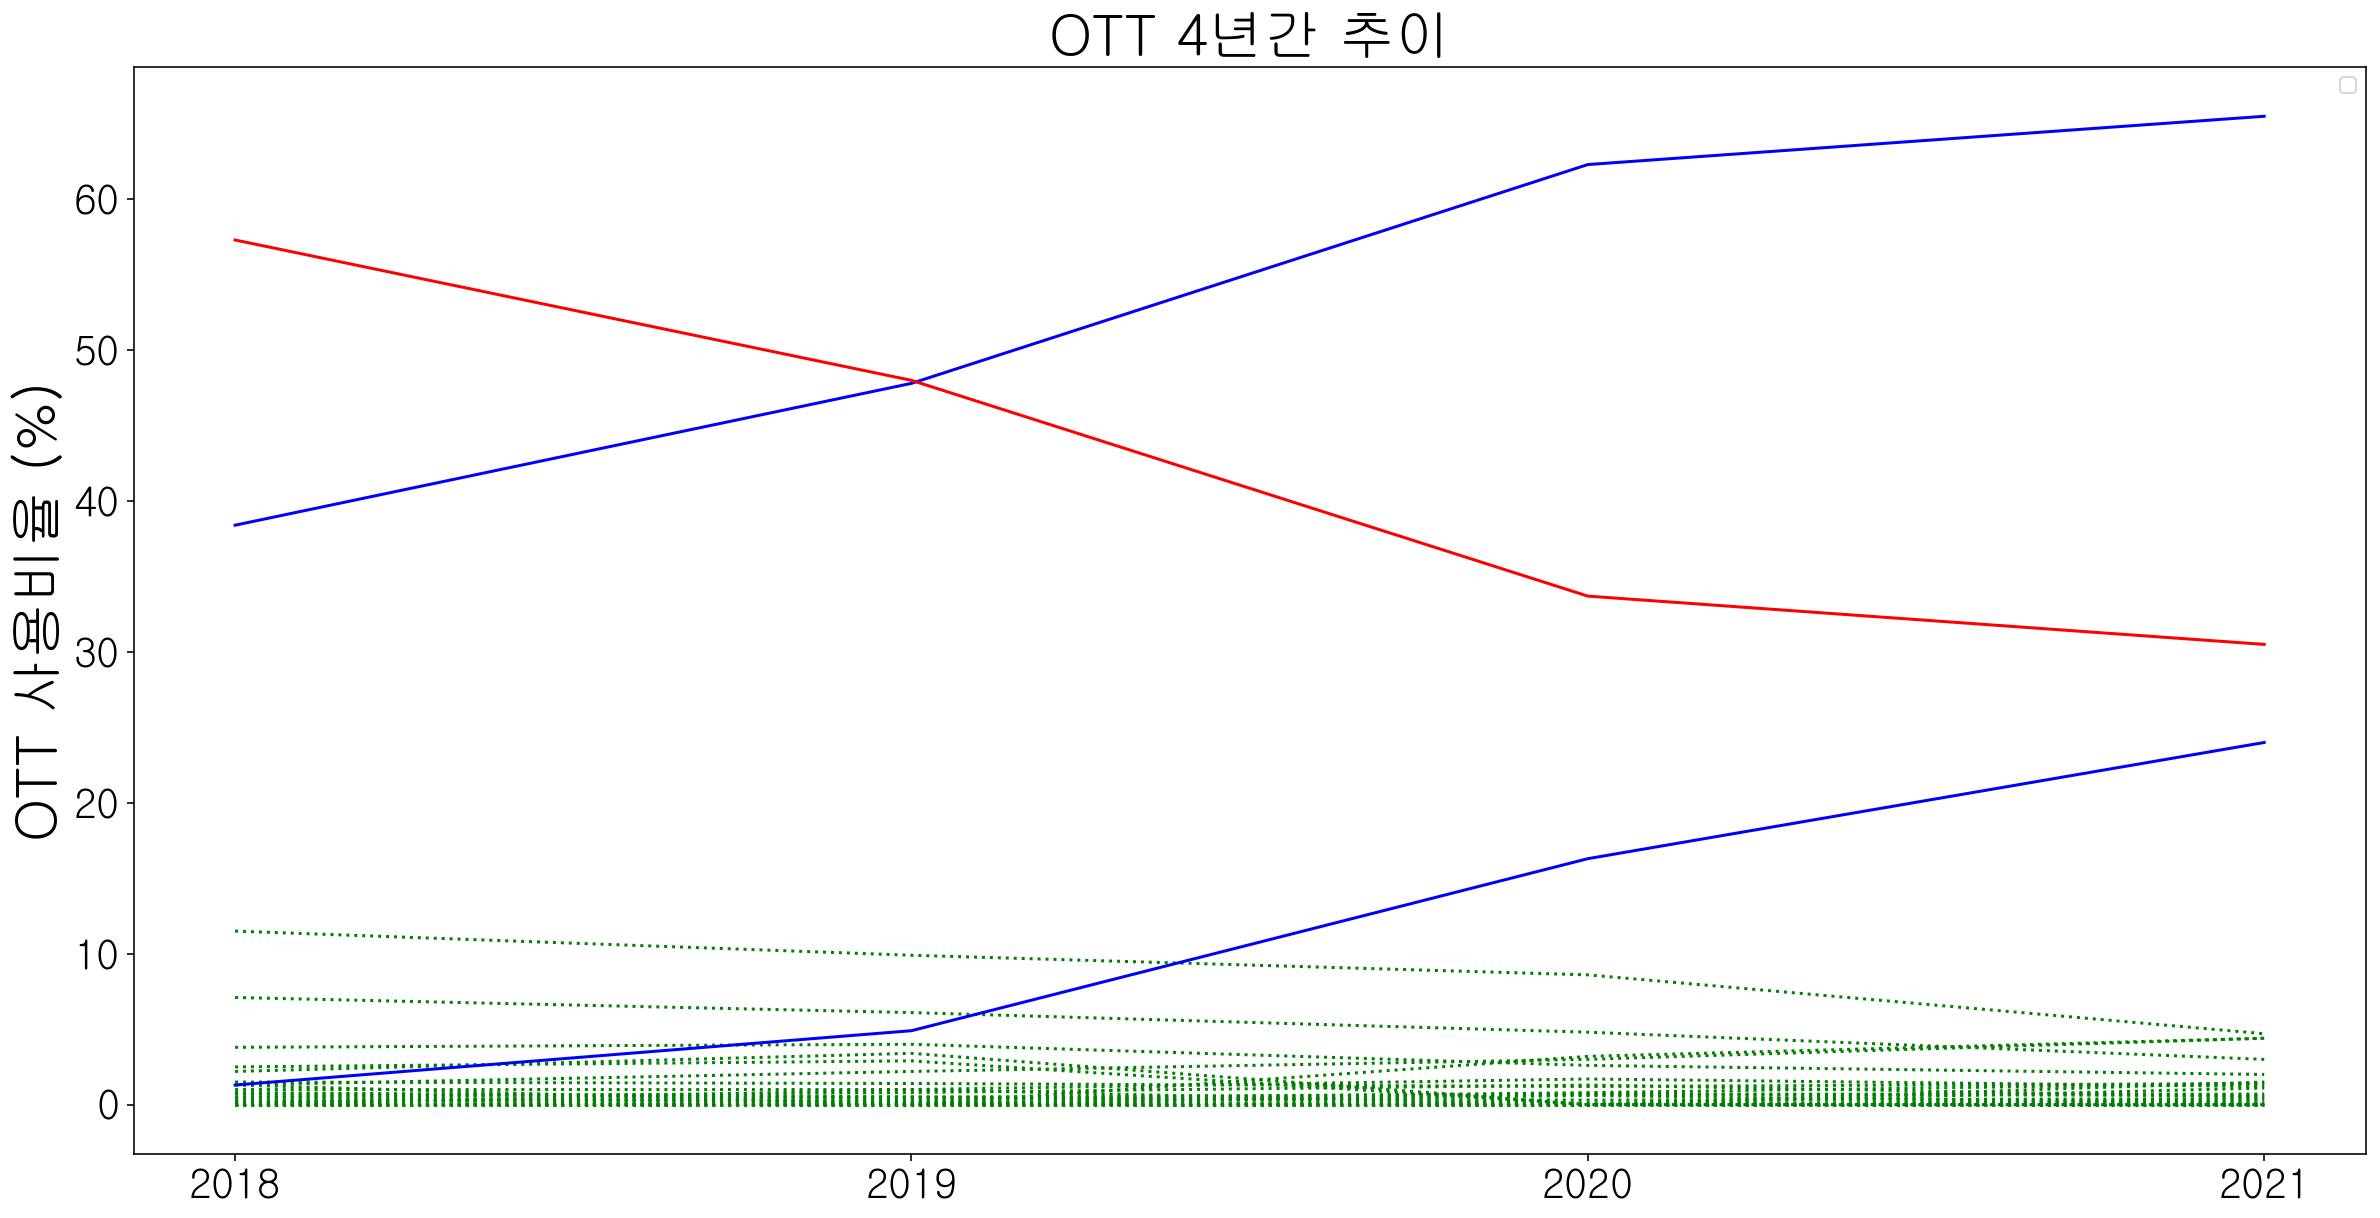

In [108]:
plt.figure(figsize=(20,10))
plt.title('OTT 4년간 추이', fontsize=28)

plt.plot(total_OTT.index, total_OTT['Oksusu'], 'g:')
plt.plot(total_OTT.index, total_OTT['Olleh TV 모바일'], 'g:')
plt.plot(total_OTT.index, total_OTT['Pooq'], 'g:')
plt.plot(total_OTT.index, total_OTT['Tving'], 'g:')
plt.plot(total_OTT.index, total_OTT['에브리온TV'], 'g:')
plt.plot(total_OTT.index, total_OTT['유플러스 비디오포럼'], 'g:')
plt.plot(total_OTT.index, total_OTT['네이버 TV'], 'g:')
plt.plot(total_OTT.index, total_OTT['V live'], 'g:')
plt.plot(total_OTT.index, total_OTT['아프리카 TV'], 'g:')
plt.plot(total_OTT.index, total_OTT['왓챠플레이'], 'g:')
plt.plot(total_OTT.index, total_OTT['곰TV'], 'g:')
plt.plot(total_OTT.index, total_OTT['판도라 TV'], 'g:')
plt.plot(total_OTT.index, total_OTT['카카오 TV'], 'g:')
plt.plot(total_OTT.index, total_OTT['페이스북'], 'g:')
plt.plot(total_OTT.index, total_OTT['유튜브'], 'b')
plt.plot(total_OTT.index, total_OTT['넷플릭스'], 'b')
plt.plot(total_OTT.index, total_OTT['데일리 모션'], 'g:')
plt.plot(total_OTT.index, total_OTT['기타'], 'g:')
plt.plot(total_OTT.index, total_OTT['이용한적 없음'], 'r')
plt.plot(total_OTT.index, total_OTT['U+모바일 TV'], 'g:')
plt.plot(total_OTT.index, total_OTT['Wavve'], 'g:')
plt.plot(total_OTT.index, total_OTT['시즌'], 'g:')
plt.plot(total_OTT.index, total_OTT['쿠팡플레이'], 'g:')
plt.plot(total_OTT.index, total_OTT['아마존프라임'], 'g:')
plt.plot(total_OTT.index, total_OTT['트위치'], 'g:')
plt.plot(total_OTT.index, total_OTT['틱톡'], 'g:')

plt.ylabel('OTT 사용비율 (%)', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlabel('x')
# plt.xlim(-3, 3)
# plt.ylim(-1, 1)
plt.legend()
plt.show()

## OTT 지역별 OTT 이용율 히트맵

In [162]:
city2018 = pd.read_excel('OTT_20182021.xlsx',engine='openpyxl', sheet_name = 1)
city2019 = pd.read_excel('OTT_20182021.xlsx',engine='openpyxl', sheet_name = 2)
city2020 = pd.read_excel('OTT_20182021.xlsx',engine='openpyxl', sheet_name = 3)
city2021 = pd.read_excel('OTT_20182021.xlsx',engine='openpyxl', sheet_name = 4)

In [163]:
city2018.set_index('매체', inplace=True)
city2019.set_index('매체', inplace=True)
city2020.set_index('매체', inplace=True)
city2021.set_index('매체', inplace=True)

In [164]:
c2018 = city2018.sort_index()
c2019 = city2019.sort_index()
c2020 = city2020.sort_index()
c2021 = city2021.sort_index()

코로나 전과 후 비교(~ 2019/ 2020 ~)

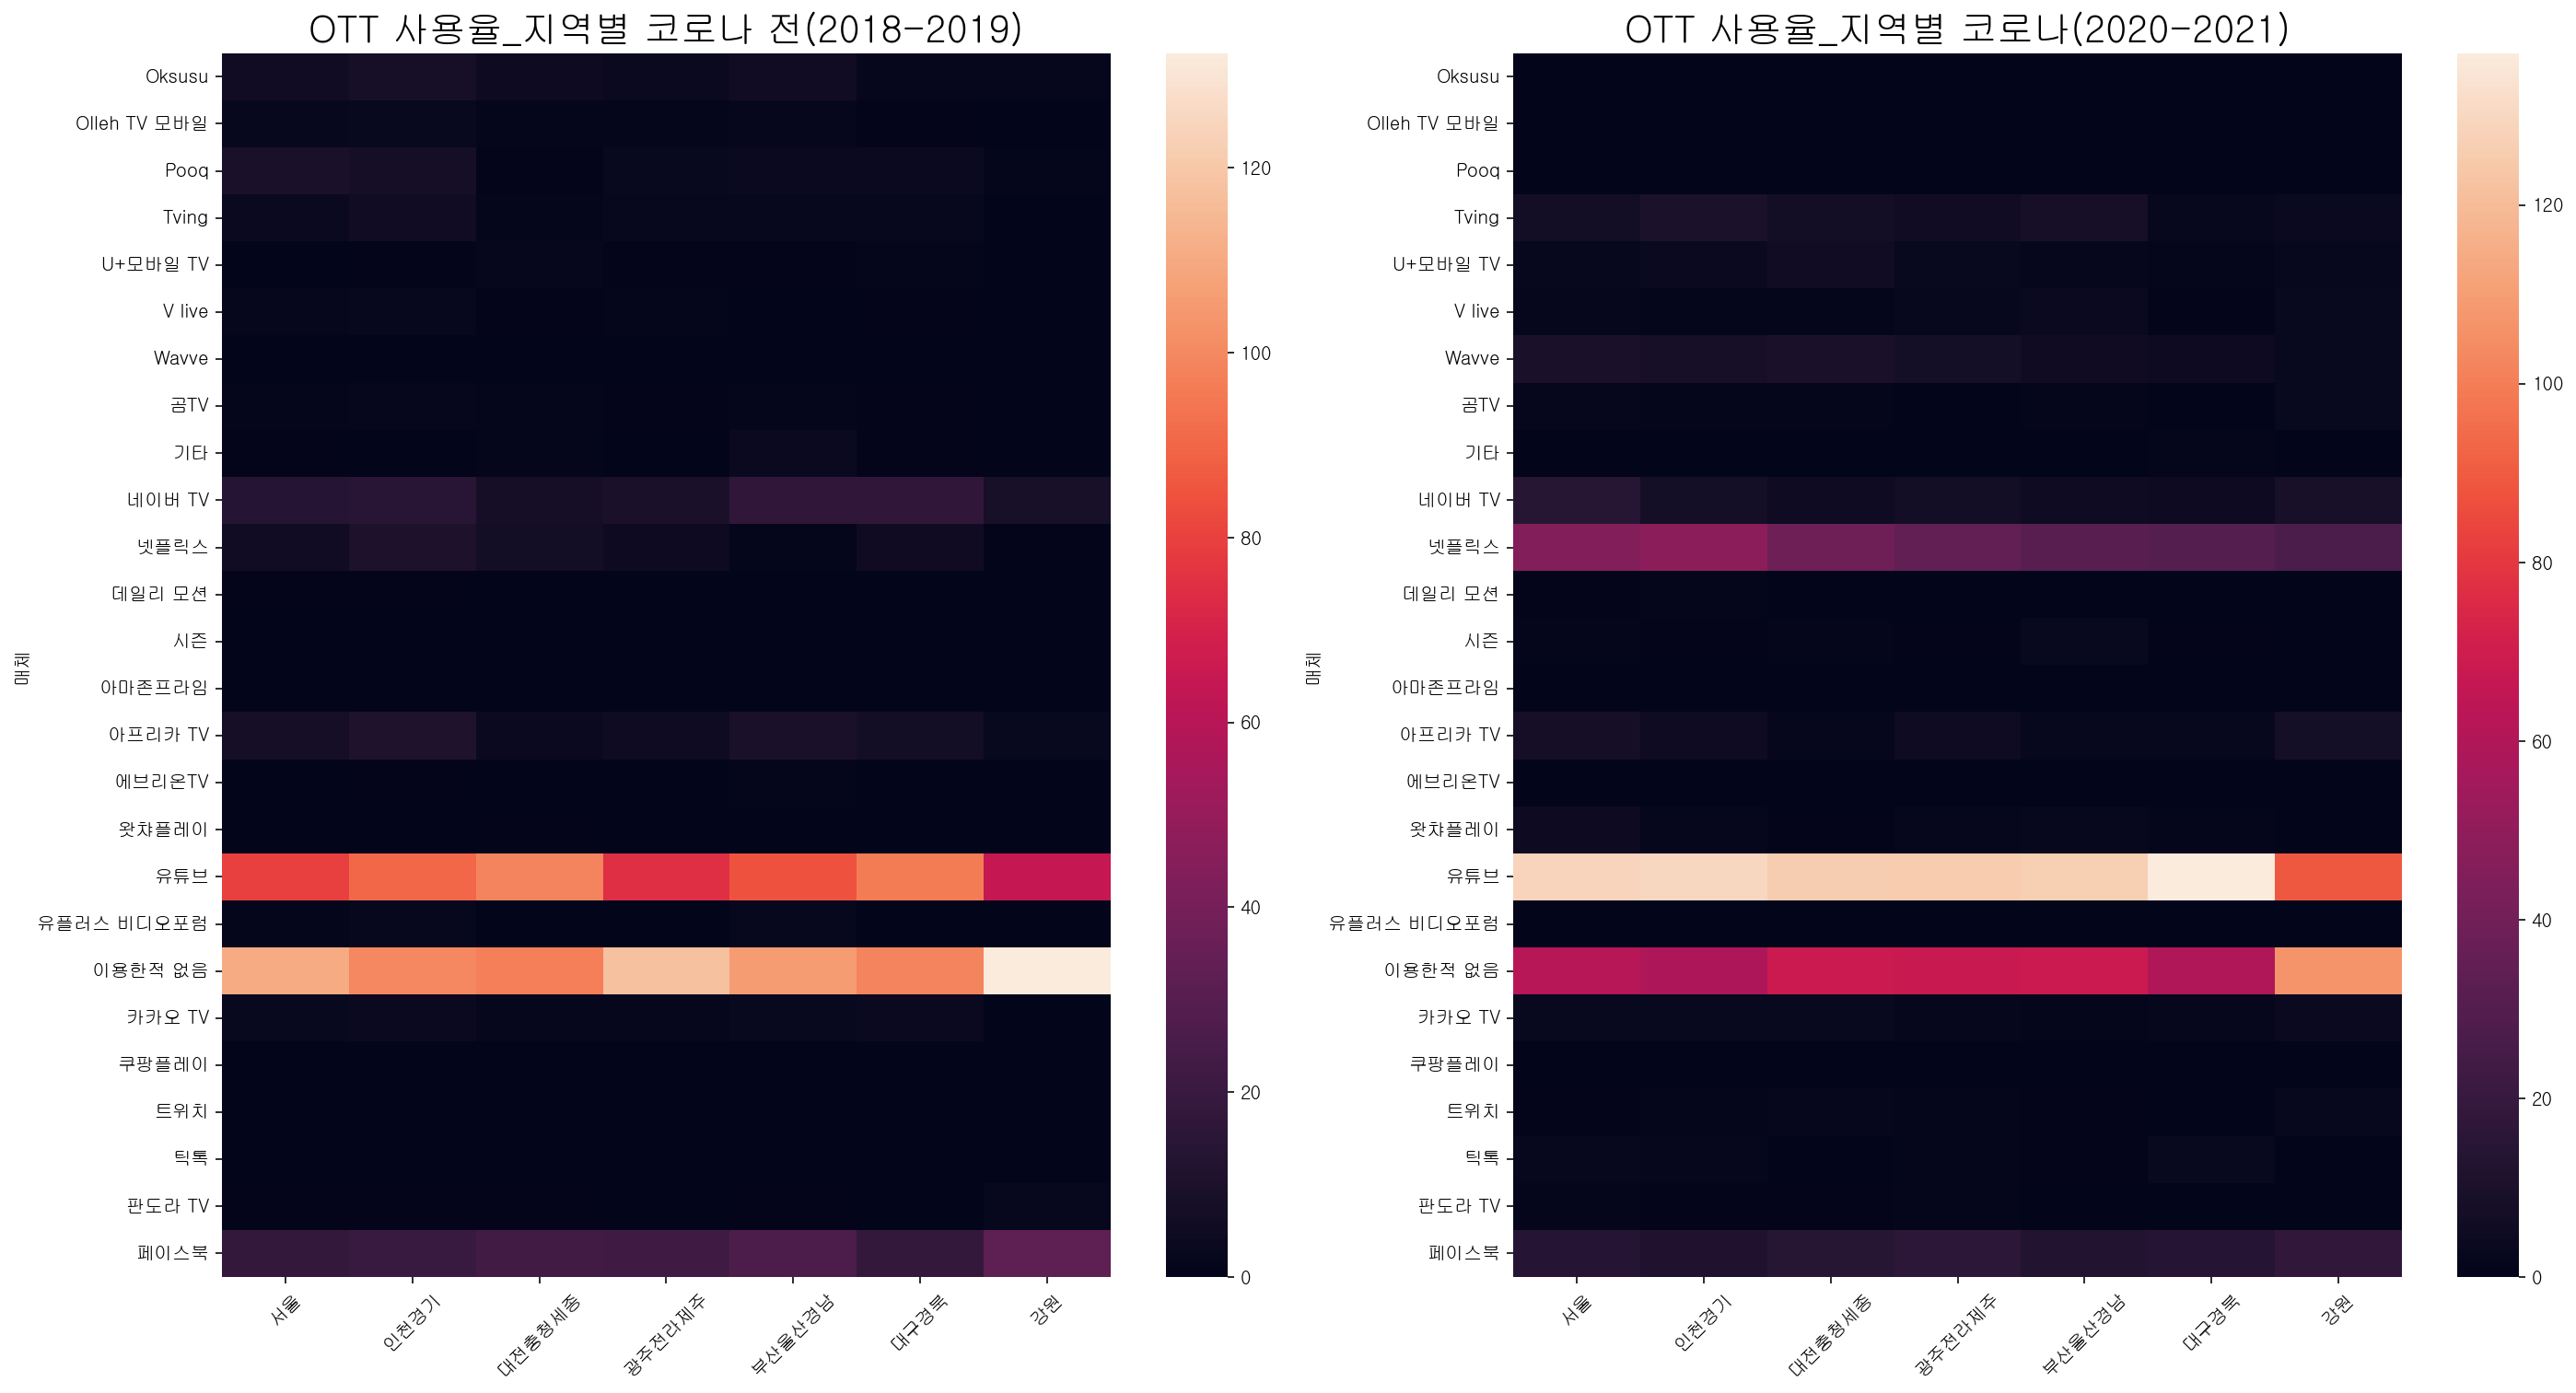

In [165]:
# 2 x 1 figure 매트릭스에 그래프 그리기
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1) # 도화지 나누기 2행 1열 그래프의 첫번째
seabornax = sns.heatmap(c2018+c2019)
plt.title('OTT 사용율_지역별 코로나 전(2018-2019)', fontsize=20)
plt.xticks(rotation=45)

plt.subplot(222) # 도화지 나누기 2행 1열 그래프의 두번째
seabornax = sns.heatmap(c2020+c2021)
plt.title('OTT 사용율_지역별 코로나(2020-2021)', fontsize=20)
plt.xticks(rotation=45)

plt.tight_layout() # 여백줄이기
plt.show()

넷플릭스와 유튜브만 나와서 \
가장 많이 사용하는 넷플릭스와 유튜브만 히트맵 작성

In [178]:
before = (c2018+c2019)/2
after = (c2020+c2021)/2

In [175]:
# 넷플릭스, 유튜브, 이용한적없음음 제거한 리스트

OTT_list.remove('이용한적 없음') #네이버 TV , 넷플릭스  , 아프리카 TV  , 유튜브  , 이용한적 없음  , 페이스북 삭제
OTT_list.remove('넷플릭스') #네이버 TV , 넷플릭스  , 아프리카 TV  , 유튜브  , 이용한적 없음  , 페이스북 삭제
OTT_list.remove('유튜브') #네이버 TV , 넷플릭스  , 아프리카 TV  , 유튜브  , 이용한적 없음  , 페이스북 삭제


In [180]:
# 데이터프레임에서 넷플릭스, 유튜브, 이용한적없음 제거
for num in OTT_list:
    before.drop(f'{num}', axis=0, inplace=True)
    after.drop(f'{num}', axis=0, inplace=True)

In [183]:
after

,서울,인천경기,대전충청세종,광주전라제주,부산울산경남,대구경북,강원
매체,,,,,,,
넷플릭스,22.6,24.3,19.25,17.25,15.70,15.05,13.60
유튜브,64.3,65.0,63.10,62.85,63.35,68.50,44.60
이용한적 없음,30.9,29.3,34.15,33.85,34.10,29.60,53.25


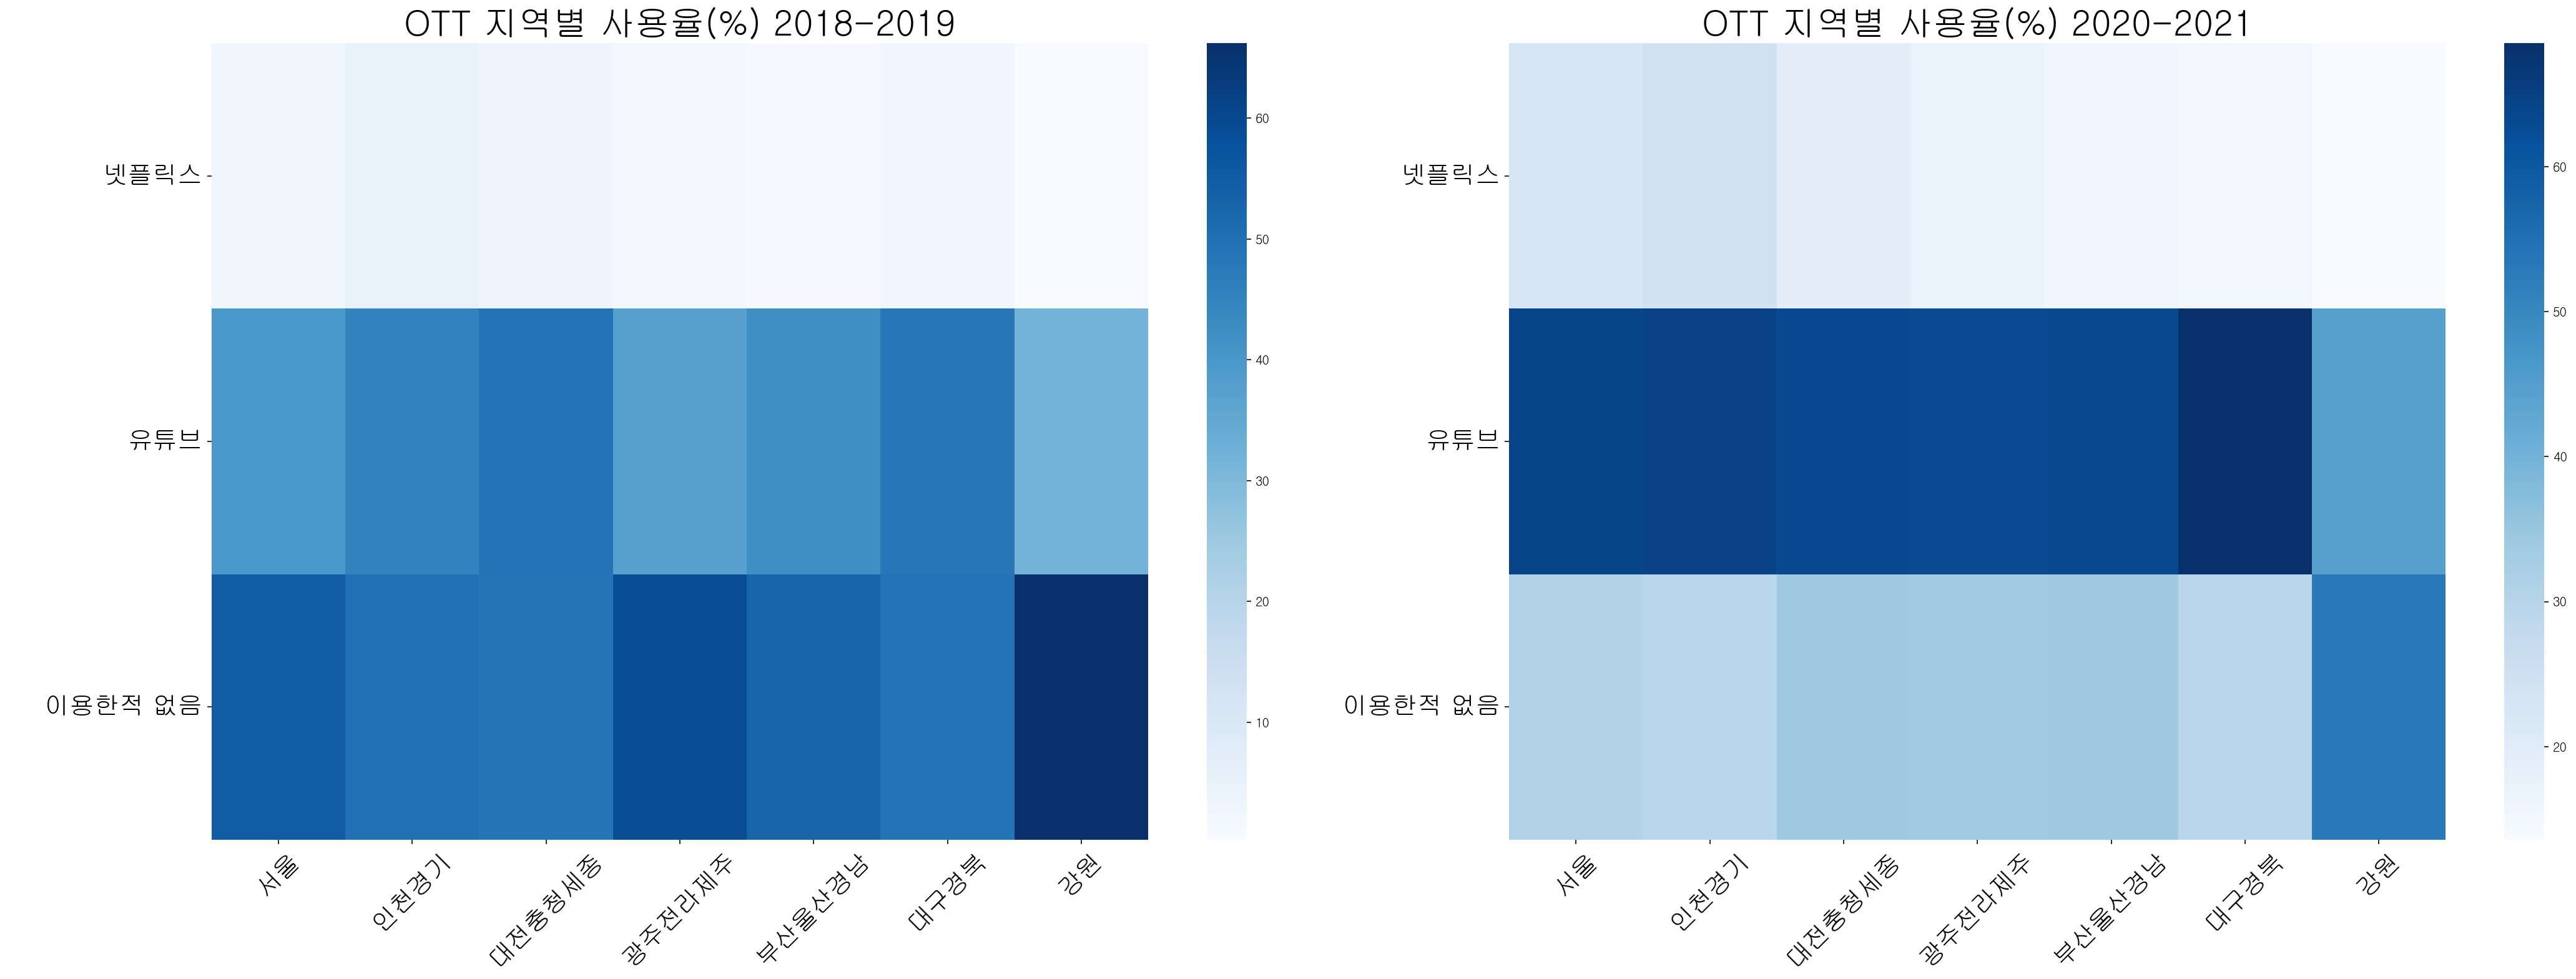

In [182]:
plt.figure(figsize=(30, 20))

plt.subplot(2, 2, 1) # 도화지 나누기 2행 1열 그래프의 첫번째
seabornax = sns.heatmap(before, cmap='Blues') # 수치가 보이고 싶으면  annot=True, fmt='f'
plt.title('OTT 지역별 사용율(%) 2018-2019', fontsize=28)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=360)
plt.ylabel(' ', fontsize=28)


plt.subplot(222) # 도화지 나누기 2행 1열 그래프의 두번째
seabornax = sns.heatmap(after, cmap='Blues') # 수치가 보이고 싶으면  annot=True, fmt='f'
plt.title('OTT 지역별 사용율(%) 2020-2021', fontsize=28)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=360)
plt.ylabel(' ', fontsize=28)

plt.tight_layout() # 여백줄이기
plt.show()

## OTT지역별 사용율 막대그래프

In [185]:
# 행열 전환

before3 = before.T
after3 = after.T
before3

매체,넷플릭스,유튜브,이용한적 없음
서울,3.05,39.65,55.20
인천경기,5.10,45.20,49.90
대전충청세종,3.25,49.20,48.45
광주전라제주,2.15,37.30,58.85
부산울산경남,0.65,42.25,52.95
대구경북,2.65,48.00,49.20
강원,0.30,32.20,66.20


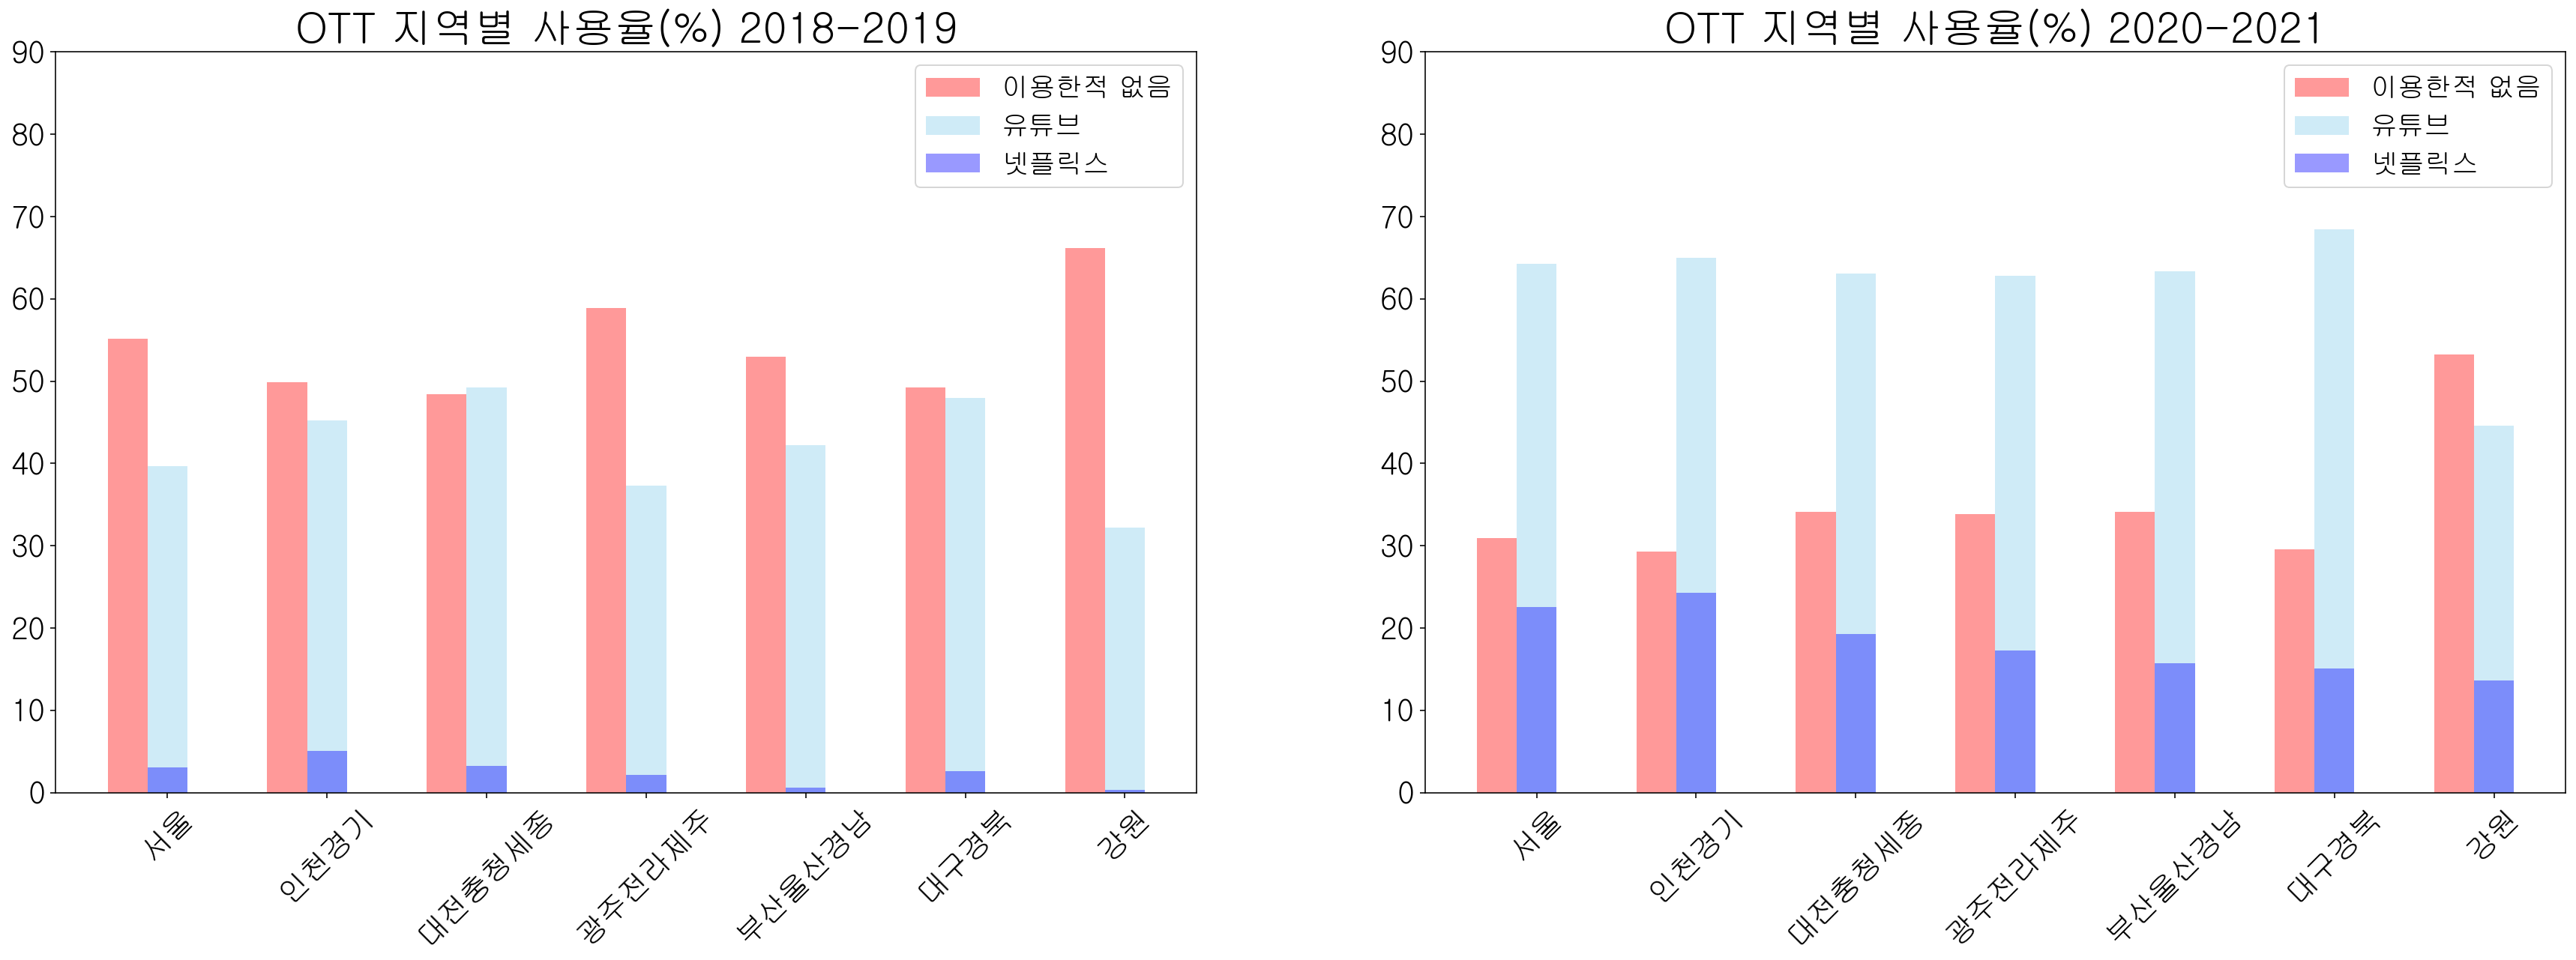

In [186]:
region = ['서울','인천경기','대전충청세종','광주전라제주','부산울산경남','대구경북','강원']

plt.figure(figsize=(30, 20))
bar_width = 0.25

plt.subplot(2, 2, 1) # 도화지 나누기 2행 1열 그래프의 첫번째
plt.title('OTT 지역별 사용율(%) 2018-2019', fontsize=28)
index = np.arange(7)
b1 = plt.bar(index, before3['이용한적 없음'], bar_width, alpha=0.4, color='red', label='이용한적 없음')
b2 = plt.bar(index + bar_width, before3['유튜브'], bar_width, alpha=0.4, color='skyblue', label='유튜브')
b2 = plt.bar(index + bar_width, before3['넷플릭스'], bar_width, alpha=0.4, color='blue', label='넷플릭스')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 7 + bar_width, 1), region, fontsize=20, rotation=45)
plt.ylim([0, 90])     # Y축의 범위: [ymin, ymax]
plt.yticks(fontsize=20)
plt.legend(fontsize=18, loc='upper right')



plt.subplot(222) # 도화지 나누기 2행 1열 그래프의 두번째
plt.title('OTT 지역별 사용율(%) 2020-2021', fontsize=28)
index = np.arange(7)
b1 = plt.bar(index, after3['이용한적 없음'], bar_width, alpha=0.4, color='red', label='이용한적 없음')
b2 = plt.bar(index + bar_width, after3['유튜브'], bar_width, alpha=0.4, color='skyblue', label='유튜브')
b2 = plt.bar(index + bar_width, after3['넷플릭스'], bar_width, alpha=0.4, color='blue', label='넷플릭스')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 7 + bar_width, 1), region, fontsize=20, rotation=45)
plt.ylim([0, 90])     # Y축의 범위: [ymin, ymax]
plt.yticks(fontsize=20)
plt.legend(fontsize=18, loc='upper right')


plt.show()

## 개봉작수 비교

In [191]:
total_df = pd.read_csv('total_list3.csv')
total_df.drop('new', axis=1, inplace=True)

In [192]:
total_df.head(2)

,year,month,region,title,open_date,sales,sales_share,cum_sales,audience,cum_audience,screen_qty,screen_count,re_nation,nation,seat_rate,seat_share,seat_qty
0,2018,9,강원도,서치,2018-08-29,464393950,0.133,497280750,56195,60606,46,2524,미국,미국,0.149,0.004,376170.0
1,2018,9,강원도,명당,2018-09-19,401559200,0.115,401559200,49665,49665,54,1726,한국,한국,0.215,0.002,230210.0


In [195]:
# 지역별 개봉작수
total_open2 = pd.pivot_table(
    total_df,
    values='title', # 데이터 프레임에 값으로 들어갈 컬럼명
    index= ['year', 'month'] , # 기준 1
    columns='region', # 기준 2
    aggfunc=len , # 어떻게 묶을건지?
    margins=True
)
total_open2.head(3)

region      강원도  경기도  경상남도  경상북도  광주시  대구시  대전시  부산시  서울시  세종시  울산시  인천시  \
year month                                                                 
2018 4       71  164   139    92   96  144   97  187  390   29   62  143   
     5       86  152   132   109   92  123   85  156  430   27   47  120   
     6       77  145   139    97   93  117   85  174  412   33   54  101   

region      전라남도  전라북도  제주도  충청남도  충청북도   All  
year month                                     
2018 4        49   113   49   112    65  2002  
     5        51   115   47   110    74  1956  
     6        51   114   52   104    68  1916

In [196]:
# 재개봉/ 신규개봉/ 미개봉 데이터 전처리

# 개봉년도 < 상영년도 -> 재개봉
reopen1 = 0 # 2018/4 - 2019/3 재개봉
reopen2 = 0 # 2019/4 - 2020/3 재개봉
reopen3 = 0 # 2020/4 - 2021/3 재개봉
reopen4 = 0 # 2021/4 - 2022/3 재개봉
reopen5 = 0 # 2022/4 - 2022/6 재개봉
open1 = 0 # 2018/4 - 2019/3 신규개봉
open2 = 0 # 2019/4 - 2020/3 신규개봉
open3 = 0 # 2020/4 - 2021/3 신규개봉
open4 = 0 # 2021/4 - 2022/3 신규개봉
open5 = 0 # 2022/4 - 2022/6 신규개봉
preopen1 = 0 # 2018/4 - 2019/3 미개봉
preopen2 = 0 # 2019/4 - 2020/3 미개봉
preopen3 = 0 # 2020/4 - 2021/3 미개봉
preopen4 = 0 # 2021/4 - 2022/3 미개봉
preopen5 = 0 # 2022/4 - 2022/6 미개봉

for num in total_df[(total_df['year'] == 2018)]['open_date'].str[:4].values.astype('float'):
    if num < 2018:
        reopen1 += 1
    elif num == 2018:
        open1 += 1
    elif num >= 2018:
        preopen1 += 1

for num in total_df[(total_df['year'] == 2019) & (total_df['month'] <= 3)]['open_date'].str[:4].values.astype('float'):
    if num < 2019:
        reopen1 += 1
    elif num == 2019:
        open1 += 1
    elif num >= 2019:
        preopen1 += 1
        
for num in total_df[(total_df['year'] == 2019) & (total_df['month'] > 3)]['open_date'].str[:4].values.astype('float'):
    if num < 2019:
        reopen2 += 1
    elif num == 2019:
        open2 += 1
    elif num >= 2019:
        preopen2 += 1
        
for num in total_df[(total_df['year'] == 2020) & (total_df['month'] <= 3)]['open_date'].str[:4].values.astype('float'):
    if num < 2020:
        reopen2 += 1
    elif num == 2020:
        open2 += 1
    elif num >= 2020:
        preopen2 += 1
        
for num in total_df[(total_df['year'] == 2020) & (total_df['month'] > 3)]['open_date'].str[:4].values.astype('float'):
    if num < 2020:
        reopen3 += 1
    elif num == 2020:
        open3 += 1
    elif num >= 2020:
        preopen3 += 1
        
for num in total_df[(total_df['year'] == 2021) & (total_df['month'] <= 3)]['open_date'].str[:4].values.astype('float'):
    if num < 2021:
        reopen3 += 1
    elif num == 2021:
        open3 += 1
    elif num >= 2021:
        preopen3 += 1
        
for num in total_df[(total_df['year'] == 2021) & (total_df['month'] > 3)]['open_date'].str[:4].values.astype('float'):
    if num < 2021:
        reopen4 += 1
    elif num == 2021:
        open4 += 1
    elif num >= 2021:
        preopen4 += 1
        
for num in total_df[(total_df['year'] == 2022) & (total_df['month'] <= 3)]['open_date'].str[:4].values.astype('float'):
    if num < 2022:
        reopen4 += 1
    elif num == 2022:
        open4 += 1
    elif num >= 2022:
        preopen4 += 1
        
for num in total_df[(total_df['year'] == 2022) & (total_df['month'] > 3)]['open_date'].str[:4].values.astype('float'):
    if num < 2022:
        reopen5 += 1
    elif num == 2022:
        open5 += 1
    elif num >= 2022:
        preopen5 += 1
        
reopen1, reopen2, reopen3, reopen4, reopen5

(3915, 4528, 7709, 4902, 1503)

In [199]:
# 재개봉, 신규개봉, 미개봉작 데이터 프레임 제작
reopen_list = [reopen1,reopen2,reopen3,reopen4,reopen5]
open_list = [open1,open2,open3,open4,open5]
preopen_list = [preopen1,preopen2,preopen3,preopen4,preopen5]
year = ['2018', '2019', '2020', '2021', '2022']

df = pd.DataFrame({'reopen' : reopen_list, 'open' : open_list, 'preopen' : preopen_list}, index=year)
df

,reopen,open,preopen
2018,3915,16175,224
2019,4528,16014,268
2020,7709,15646,154
2021,4902,14890,123
2022,1503,6739,0


In [203]:
# 총 상영 데이터
sumtotal = df.sum(axis=1)  

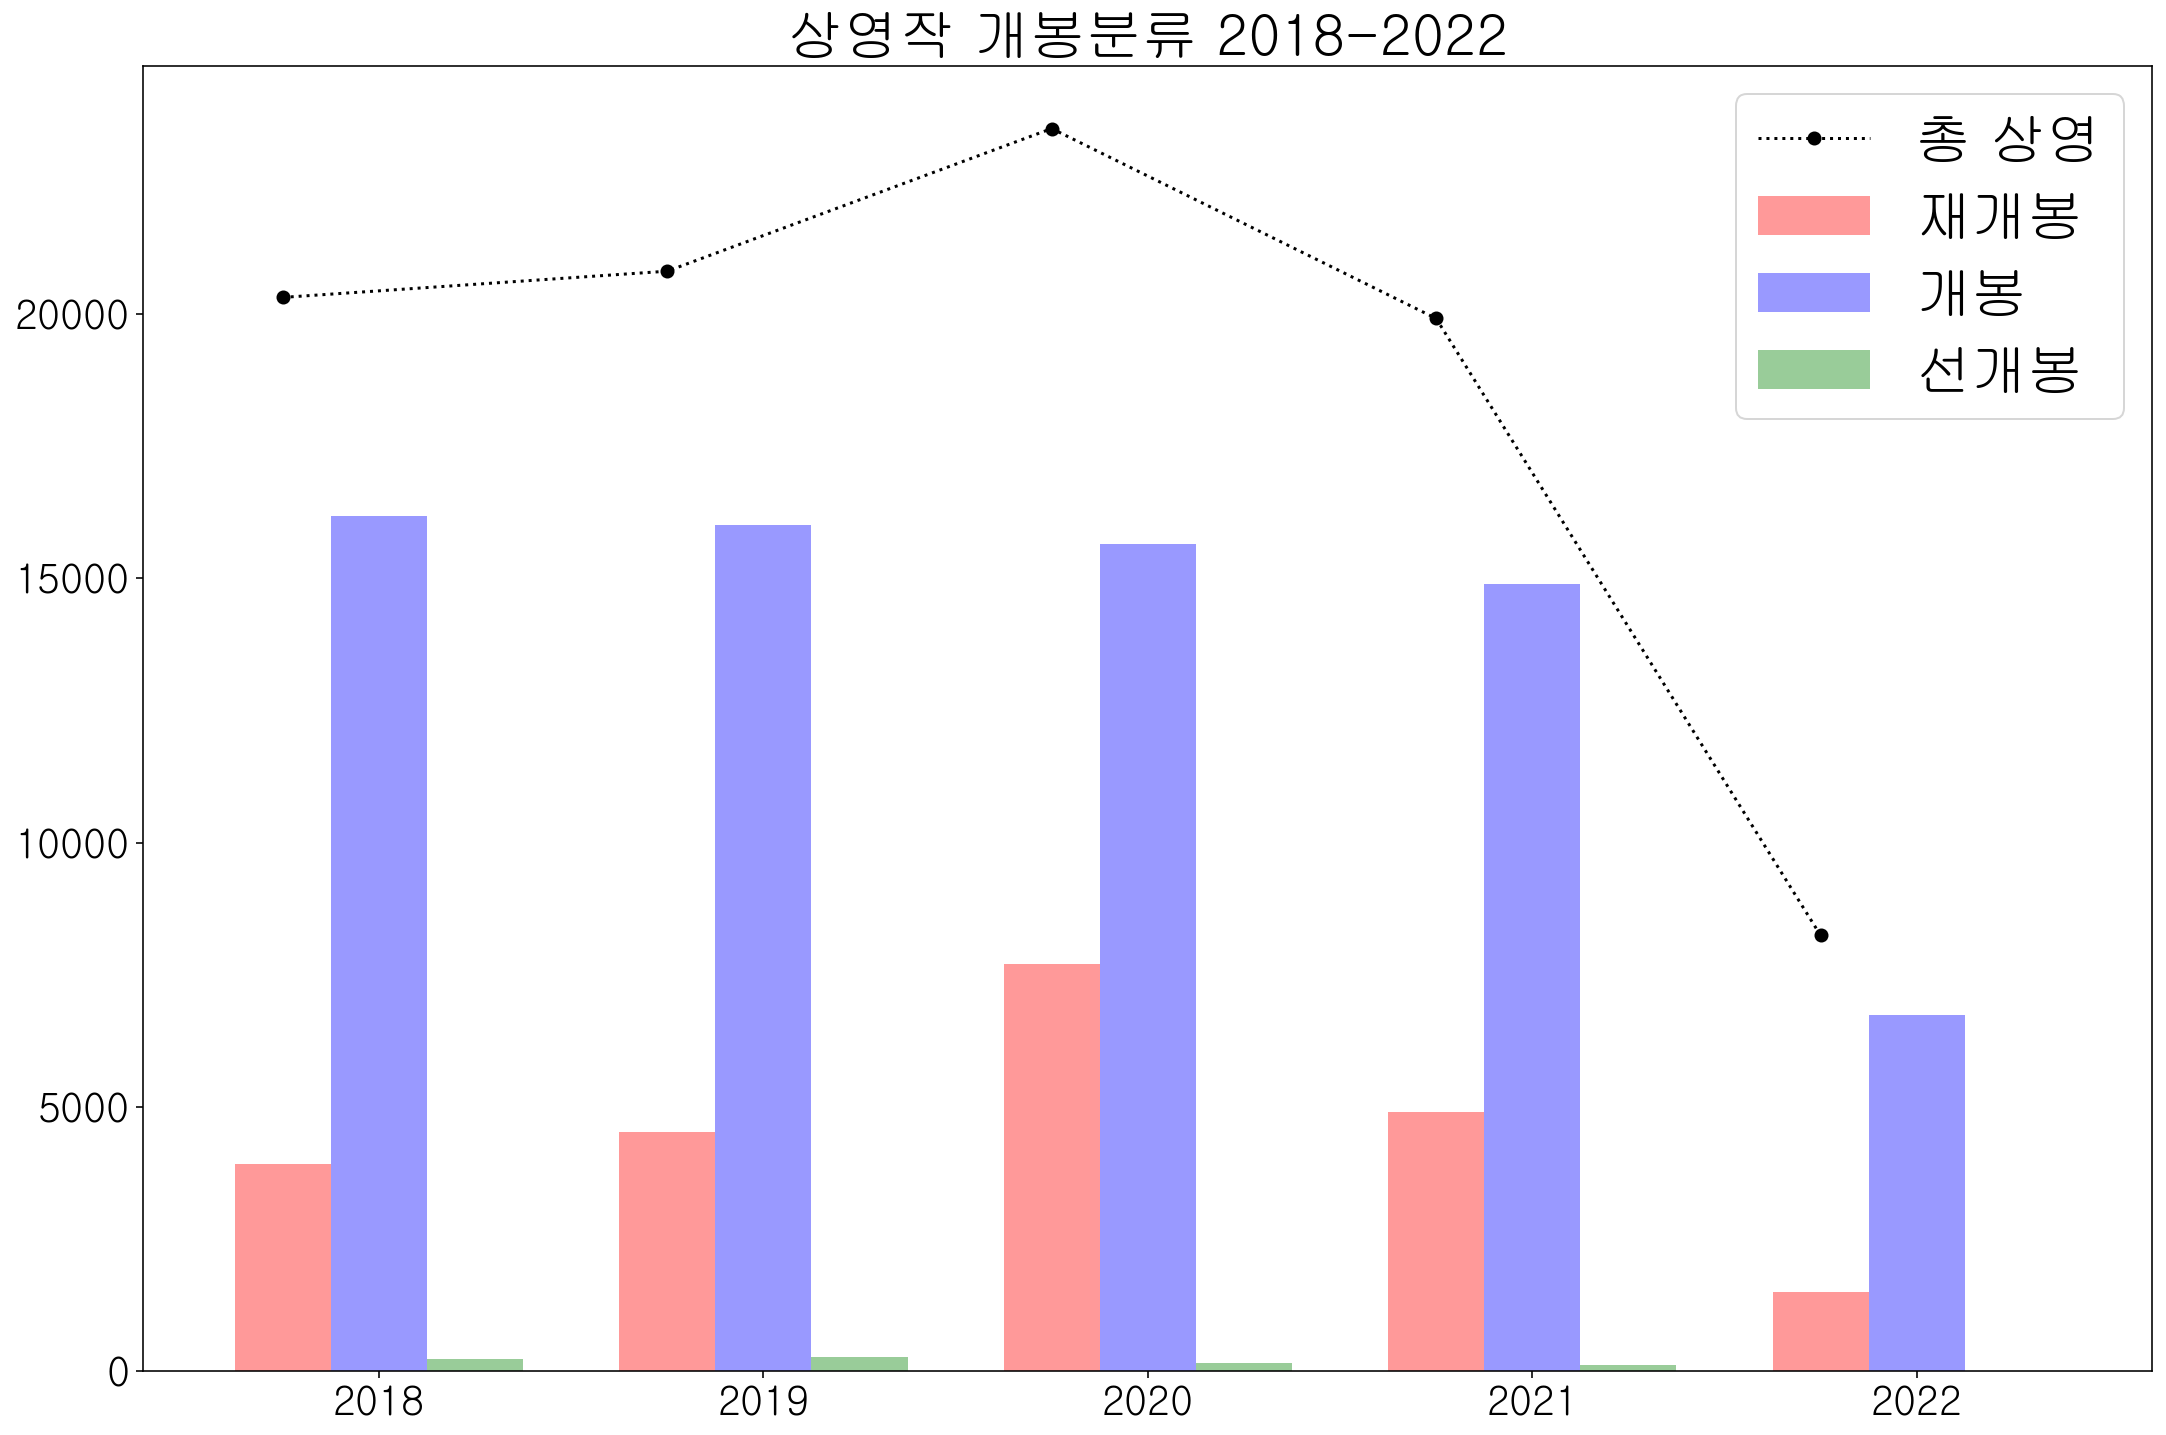

In [204]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(18,12))
bar_width = 0.25
plt.title('상영작 개봉분류 2018-2022', fontsize=28)

# 연도가 5개이므로 0, 1, 2, 3, 4 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df['reopen'], bar_width, alpha=0.4, color='red', label='재개봉')
b2 = plt.bar(index + bar_width, df['open'], bar_width, alpha=0.4, color='blue', label='개봉')
b3 = plt.bar(index + 2 * bar_width, df['preopen'], bar_width, alpha=0.4, color='green', label='선개봉')
plt.plot(index,sumtotal, 'ko:', label='총 상영')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 5 + bar_width, 1), year, fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=28)
plt.show()